# **"Sentetik Ogrenci Veriseti" Üzerinde Python ile Makine Öğrenmesi**

#### **Projenin Amaci:** Öğrenci Notlari veri setinde verilern bağimsiz veriler ile bilgisayarimizi eğitmek. Ve bu eğitim neticesinde uygulamammizi kullanan kisilerin gerekli bilgilerini alarak, kullanicinin isteğine bağli olarak; 1- Kullaniciya uygun üniversite bölümlerini 2- Seçtiği dersin not tahminini göstereceğiz


### **0. Gerekli Kütüphanelerin Projeye Dahil Edilmesi**

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler                                                                    # Kategorik verileri sayiya dönüştürme ve ölçekleme işlemleri için (ön işleme)
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_curve, auc                    # Siniflandirma performansini ölçmek için çeşitli metrikler ve görselleştirmeler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression                                                                 # Lojistik regresyon algoritmasi (binary/multi siniflandirma için)
from sklearn.ensemble import RandomForestClassifier                                                                 # Siniflandirma algoritmasi: Rastgele agaçlar kullanarak karar verme (classification)
from sklearn.ensemble import RandomForestRegressor                                                                  # Regresyon algoritmasi: Rastgele agaçlar ile sürekli deger tahmini (regression)
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier                                                                    # Yapay sinir agi icin.
from sklearn.svm import SVR
from sklearn.svm import SVC                                                                                         # Destek vektör makineleri (siniflandirma için güçlü bir algoritma)

import matplotlib.pyplot as plt                                                                                     # Grafik çizimi için temel kütüphane (çizim ve gösterim)
from matplotlib.patches import Rectangle                                                                            # Matplotlib üzerinde özel şekiller çizebilmek için (örnegin dikdörtgen vs.)

import pandas as pd                                                                                                 # Veri setleriyle çalişmak ve veri analizi yapmak için temel kütüphane
import random

import numpy as np                                                                                                  # Sayisal işlemler, matrisler ve istatistiksel hesaplamalar için temel kütüphane

import seaborn as sns                                                                                               # Gelişmiş ve şik grafikler çizmek için Matplotlib üzerine kurulu kütüphane

from scipy.stats import pearsonr                                                                                    # Korelasyon hesaplamasi (örnegin Pearson korelasyonu) için istatistiksel fonksiyon

import shap                                                                                                         # SHAP: Modelin kararlarini açiklamak ve görselleştirmek için (explainable AI)


###

### **1. Veri Ön İşleme (Preprocessing) ve Görselleştirme (EDA)**

In [530]:
data = pd.read_excel('Datasets\Sentetik_Ogrenci_Veriseti.xlsx')       # Excel formatindaki veri seti okundu "data" degiskenine atandi
data.index = range(1, len(data) + 1)

display(data)                                                 # Ham veri setini goster
print(data['GANO'].describe())

OgrNo  Yas  AnneMeslek  BabaMeslek SevilenDers_1 SevilenDers_2  \
1         1   30           2           4  TDveEdebiyat  DinKveAhlakB   
2         2   18           2           5         Fizik     Ingilizce   
3         3   22           4           2  TDveEdebiyat     Ingilizce   
4         4   28           2           2  TDveEdebiyat     Ingilizce   
5         5   17           4           2  TDveEdebiyat         Muzik   
...     ...  ...         ...         ...           ...           ...   
996     996   22           5           4     Matematik         Resim   
997     997   25           1           2     Matematik         Muzik   
998     998   17           4           1     Matematik     Ingilizce   
999     999   30           1           3  TDveEdebiyat     Ingilizce   
1000   1000   19           2           3     Matematik         Resim   

      OzelDers  DersCalisma  KitapOkuma  Etkinlik  ...  Ders_2  Ders_3  \
1            1        100.0          43         5  ...   100.0    86.5   
2            1         81.6          40         1  ...    32.5    95.0   
3            0         59.0           0         5  ...    85.0   100.0   
4            0          9.0          11         2  ...   100.0   100.0   
5            1         70.8          24         5  ...    68.5    56.0   
...        ...          ...         ...       ...  ...     ...     ...   
996          0         69.0          44         1  ...    56.0    81.0   
997          0         85.0          33         2  ...    51.5    39.0   
998          1         76.8          49         1  ...    72.5    10.0   
999          1         22.8          44         4  ...   100.0    99.0   
1000         1         30.0          49         2  ...    43.5     6.0   

      Ders_4  Ders_5  Ders_6  Ders_7  Ders_8  Ders_9  Ders_10   GANO  
1      100.0   100.0    74.0   100.0    86.5    74.0     99.0  84.40  
2       82.5   100.0    32.5   100.0    95.0   100.0     45.0  71.50  
3       10.0    47.5    22.5    85.0    10.0    72.5     72.5  55.25  
4       99.0    74.0    86.5    99.0    74.0    49.0    100.0  84.30  
5       56.0    93.5    68.5    56.0    56.0   100.0    100.0  75.45  
...      ...     ...     ...     ...     ...     ...      ...    ...  
996     31.0   100.0    31.0    31.0    56.0    31.0      6.0  51.65  
997    100.0    39.0    51.5   100.0    39.0    89.0     14.0  59.95  
998     97.5    22.5    10.0    72.5    35.0    97.5    100.0  54.00  
999     49.0   100.0    61.5   100.0   100.0    61.5     24.0  73.15  
1000    93.5   100.0    93.5    93.5    43.5    93.5     81.0  66.65  

[1000 rows x 34 columns]

count    1000.000000
mean       62.500200
std        11.572699
min        26.250000
25%        54.125000
50%        62.800000
75%        71.212500
max        90.550000
Name: GANO, dtype: float64


### a. Verisetindeki Stringleri Integar' a Çevirme

In [ ]:
label_cols = ["SevilenDers_1", "SevilenDers_2"]                                   # Islem yapilacak sutunlar
ders_map = {
    "TDveEdebiyat" : 1,
    "Matematik": 2,
    "Fizik": 3,
    "Kimya": 4,
    "Biyoloji": 5,
    "Tarih": 6,
    "Cografya": 7,
    "DinKveAhlakB": 8,
    "BedenEgitimi": 9,
    "Resim": 10,
    "Muzik": 11,
    "Ingilizce" : 12        
}

data["SevilenDers_1"] = data["SevilenDers_1"].map(ders_map)
data["SevilenDers_2"] = data["SevilenDers_2"].map(ders_map)

bolum_map = {'BM': 1, 'H': 2, 'G': 3}                                             # Bolum degerlerini sayisallastiralim
data['Bolum'] = data['Bolum'].map(bolum_map)

data = data.drop("OgrNo", axis=1)                                                 # Gereksiz olan OgrNo sutununu cikariyoruz 

display(data)                                                                     # Yeni veri setini goster

Yas  AnneMeslek  BabaMeslek  SevilenDers_1  SevilenDers_2  OzelDers  \
1      30           2           4              1              8         1   
2      18           2           5              3             12         1   
3      22           4           2              1             12         0   
4      28           2           2              1             12         0   
5      17           4           2              1             11         1   
...   ...         ...         ...            ...            ...       ...   
996    22           5           4              2             10         0   
997    25           1           2              2             11         0   
998    17           4           1              2             12         1   
999    30           1           3              1             12         1   
1000   19           2           3              2             10         1   

      DersCalisma  KitapOkuma  Etkinlik  TDveEdebiyat  ...  Ders_2  Ders_3  \
1           100.0          43         5            98  ...   100.0    86.5   
2            81.6          40         1            95  ...    32.5    95.0   
3            59.0           0         5            66  ...    85.0   100.0   
4             9.0          11         2            86  ...   100.0   100.0   
5            70.8          24         5            98  ...    68.5    56.0   
...           ...         ...       ...           ...  ...     ...     ...   
996          69.0          44         1            62  ...    56.0    81.0   
997          85.0          33         2            77  ...    51.5    39.0   
998          76.8          49         1            66  ...    72.5    10.0   
999          22.8          44         4            97  ...   100.0    99.0   
1000         30.0          49         2            65  ...    43.5     6.0   

      Ders_4  Ders_5  Ders_6  Ders_7  Ders_8  Ders_9  Ders_10   GANO  
1      100.0   100.0    74.0   100.0    86.5    74.0     99.0  84.40  
2       82.5   100.0    32.5   100.0    95.0   100.0     45.0  71.50  
3       10.0    47.5    22.5    85.0    10.0    72.5     72.5  55.25  
4       99.0    74.0    86.5    99.0    74.0    49.0    100.0  84.30  
5       56.0    93.5    68.5    56.0    56.0   100.0    100.0  75.45  
...      ...     ...     ...     ...     ...     ...      ...    ...  
996     31.0   100.0    31.0    31.0    56.0    31.0      6.0  51.65  
997    100.0    39.0    51.5   100.0    39.0    89.0     14.0  59.95  
998     97.5    22.5    10.0    72.5    35.0    97.5    100.0  54.00  
999     49.0   100.0    61.5   100.0   100.0    61.5     24.0  73.15  
1000    93.5   100.0    93.5    93.5    43.5    93.5     81.0  66.65  

[1000 rows x 33 columns]

### b_1. Yaş Dağilimi - Eski

C:\Users\Hakan\AppData\Local\Temp\ipykernel_16284\4023799432.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(gradient,


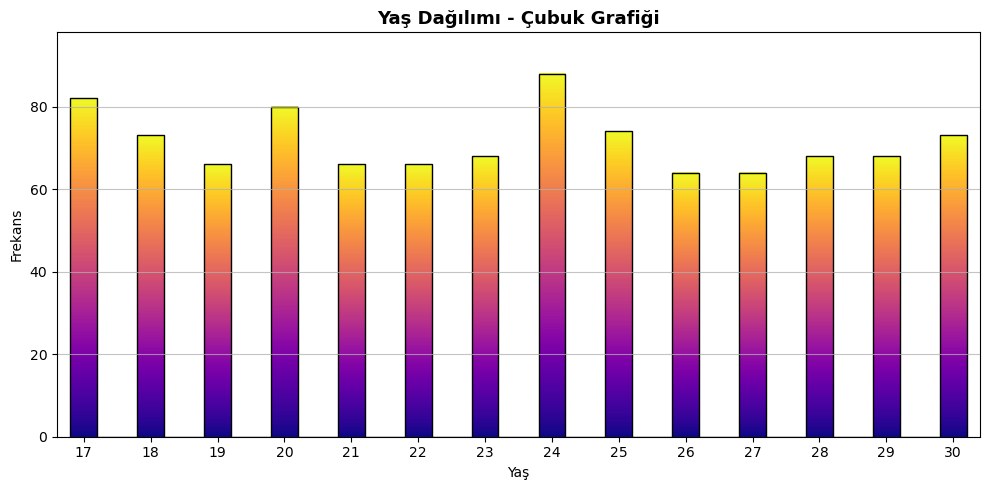

In [ ]:
# Histogram verisi ve binler
bins = [ 16.8, 17.2,17.8, 18.2, 18.8, 19.2, 19.8, 20.2, 20.8, 21.2, 21.8, 22.2, 22.8, 23.2, 23.8, 24.2, 24.8, 25.2, 25.8, 26.2, 26.8, 27.2, 27.8, 28.2, 28.8, 29.2, 29.8, 30.2]
counts, bins = np.histogram(data['Yas'], bins=bins)

fig, ax = plt.subplots(figsize=(10, 5))

# Gradyan (dikey)
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.repeat(gradient, 2, axis=1)

# Histogram çubuklarini çiz
for i in range(len(counts)):
    left = bins[i]
    right = bins[i + 1]
    bottom = 0
    top = counts[i]

    ax.imshow(gradient,
              extent=[left, right, bottom, top],
              origin='lower',
              aspect='auto',
              cmap='plasma',
              alpha=1)

    # Kenarlik çiz
    rect = Rectangle((left, bottom), right - left, top,
                     fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Başlik ve etiketler
ax.set_title("Yaş Dağilimi - Çubuk Grafiği", fontsize=13, fontweight='bold')
ax.set_xlabel("Yaş")
ax.set_ylabel("Frekans")
ax.set_xticks([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
ax.grid(axis='y', alpha=0.75)

# Sorunlari çözen ek ayarlar:
ax.set_xlim(bins[0] - 0.2, bins[-1] + 0.2)  # İlk ve son çubuğun tamami görünsün
ax.set_ylim(0, max(counts) + 10)           # Üst siniri max değerden 10 fazla yap

plt.tight_layout()
plt.show()


### b_2. Dengesiz Yaşlarin Düzenlenmesi

In [ ]:
yas_30_indeksler = data[data["Yas"] == 30].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_30_indeksler) // 2                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_30_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 20   

yas_30_indeksler = data[data["Yas"] == 30].index.tolist()
yas_29_indeksler = data[data["Yas"] == 29].index.tolist()                                   # Yaşi 29 olanlarin indekslerini bul
secilecek_adet = (len(yas_29_indeksler) // 2 ) + (len(yas_30_indeksler) // 3)
top_indeksler = yas_29_indeksler + yas_30_indeksler
degistirilecek_indeksler = random.sample(top_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 19                                              # Seçilen indekslerdeki yaşlari 20 olarak güncelle

yas_28_indeksler = data[data["Yas"] == 28].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_28_indeksler) // 2                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_28_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 20                                              # Seçilen indekslerdeki yaşlari 20 olarak güncelle

yas_27_indeksler = data[data["Yas"] == 27].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_27_indeksler) // 2                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_27_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 21                                              # Seçilen indekslerdeki yaşlari 20 olarak güncelle

yas_26_indeksler = data[data["Yas"] == 26].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_26_indeksler) // 3                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_26_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 22                                              # Seçilen indekslerdeki yaşlari 20 olarak güncelle

yas_25_indeksler = data[data["Yas"] == 25].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_25_indeksler) // 3                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_25_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 19                                              # Seçilen indekslerdeki yaşlari 20 olarak güncelle

yas_25_indeksler = data[data["Yas"] == 25].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_25_indeksler) // 3                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_25_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 20     

yas_24_indeksler = data[data["Yas"] == 24].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_24_indeksler) // 2                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_24_indeksler, secilecek_adet)

# Bu yarinin da yarisini 17, diğer yarisini 18 yaptik
yarisi = secilecek_adet // 2
indeks_18 = degistirilecek_indeksler[:yarisi]
indeks_22 = degistirilecek_indeksler[yarisi:]

# Değerleri güncelle
data.loc[indeks_18, "Yas"] = 17
data.loc[indeks_22, "Yas"] = 18

yas_23_indeksler = data[data["Yas"] == 23].index.tolist()                                   # Yaşi 30 olanlarin indekslerini bul
secilecek_adet = len(yas_23_indeksler) // 3                                                 # Yarisini rastgele seç
degistirilecek_indeksler = random.sample(yas_23_indeksler, secilecek_adet)
data.loc[degistirilecek_indeksler, "Yas"] = 19  

### b_3. Yaş dağilimi - Yeni

C:\Users\Hakan\AppData\Local\Temp\ipykernel_16284\1913389397.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(gradient,


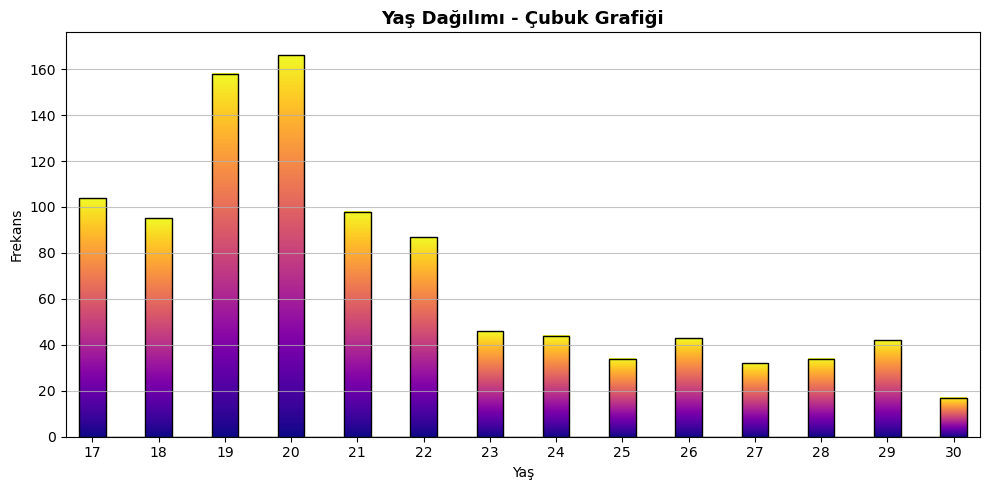

In [ ]:
# Histogram verisi ve binler
bins = [ 16.8, 17.2,17.8, 18.2, 18.8, 19.2, 19.8, 20.2, 20.8, 21.2, 21.8, 22.2, 22.8, 23.2, 23.8, 24.2, 24.8, 25.2, 25.8, 26.2, 26.8, 27.2, 27.8, 28.2, 28.8, 29.2, 29.8, 30.2]
counts, bins = np.histogram(data['Yas'], bins=bins)

fig, ax = plt.subplots(figsize=(10, 5))

# Gradyan (dikey)
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.repeat(gradient, 2, axis=1)

# Histogram çubuklarini çiz
for i in range(len(counts)):
    left = bins[i]
    right = bins[i + 1]
    bottom = 0
    top = counts[i]

    ax.imshow(gradient,
              extent=[left, right, bottom, top],
              origin='lower',
              aspect='auto',
              cmap='plasma',
              alpha=1)

    # Kenarlik çiz
    rect = Rectangle((left, bottom), right - left, top,
                     fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Baslik ve etiketler
ax.set_title("Yas Dağilimi - Çubuk Grafiği", fontsize=13, fontweight='bold')
ax.set_xlabel("Yas")
ax.set_ylabel("Frekans")
ax.set_xticks([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
ax.grid(axis='y', alpha=0.75)

# Sorunlari çözen ek ayarlar:
ax.set_xlim(bins[0] - 0.2, bins[-1] + 0.2)  # İlk ve son çubuğun tamami görünsün
ax.set_ylim(0, max(counts) + 10)            # Üst siniri max değerden 10 fazla yap

plt.tight_layout()
plt.show()


### c_1. Anne Meslekleri Dağilimi - Eski

In [ ]:
# Histogram verisi ve binler
bins = [ 0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2, 4.8, 5.2, 5.8]
counts, bins = np.histogram(data['AnneMeslek'], bins=bins)

fig, ax = plt.subplots(figsize=(10, 5))

# Gradyan (dikey)
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.repeat(gradient, 2, axis=1)

# Histogram çubuklarini çiz
for i in range(len(counts)):
    left = bins[i]
    right = bins[i + 1]
    bottom = 0
    top = counts[i]

    ax.imshow(gradient,
              extent=[left, right, bottom, top],
              origin='lower',
              aspect='auto',
              cmap='viridis',
              alpha=1)

    # Kenarlik çiz
    rect = Rectangle((left, bottom), right - left, top,
                     fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Başlik ve etiketler
ax.set_title("Anne Mesleği Dağilimi - Çubuk Grafiği", fontsize=13, fontweight='bold')
ax.set_xlabel("Meslekler")
ax.set_ylabel("Frekans")
plt.xticks([1, 2, 3, 4, 5], ['Ev Hanimi', 'Avukat', 'Gazeteci', 'Mühendis', 'Diğer'])
ax.grid(axis='y', alpha=0.75)

# Sorunlari çözen ek ayarlar:
ax.set_xlim(bins[0] - 0.2, bins[-1] + 0.2)  # İlk ve son çubuğun tamami görünsün
ax.set_ylim(0, max(counts) + 10)           # Üst siniri max değerden 10 fazla yap

plt.tight_layout()
plt.show()



C:\Users\Hakan\AppData\Local\Temp\ipykernel_16284\3518553508.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(gradient,


### c_2. Mesleklerin Düzenlenmesi

In [536]:
meslek_1 = data[data["AnneMeslek"] == 1].index.tolist()                                     # Meslegi 1 olanlari sec.
secilecek_adet = len(meslek_1) // 5                                                         # Secilenlerin 1/5'ini sec.
degistirilecek_indeksler = random.sample(meslek_1, secilecek_adet)                          # Secilenleri rastgele sec.
data.loc[degistirilecek_indeksler, "AnneMeslek"] = 5                                        # Secilen indekslerdeki mesleklerini 5 olarak güncelle

meslek_2 = data[data["AnneMeslek"] == 2].index.tolist()                                  
secilecek_adet = len(meslek_2) // 5                                                       
degistirilecek_indeksler = random.sample(meslek_2, secilecek_adet)                       
data.loc[degistirilecek_indeksler, "AnneMeslek"] = 5                                   

meslek_3 = data[data["AnneMeslek"] == 3].index.tolist()                                  
secilecek_adet = len(meslek_3) // 5                                                   
degistirilecek_indeksler = random.sample(meslek_3, secilecek_adet)                  
data.loc[degistirilecek_indeksler, "AnneMeslek"] = 5                                      

meslek_4 = data[data["AnneMeslek"] == 4].index.tolist()                                  
secilecek_adet = len(meslek_4) // 5                                                      
degistirilecek_indeksler = random.sample(meslek_4, secilecek_adet)                        
data.loc[degistirilecek_indeksler, "AnneMeslek"] = 5                               

### c_3. Anne Meslekleri Dağilimi - Yeni

C:\Users\Hakan\AppData\Local\Temp\ipykernel_16284\3518553508.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(gradient,


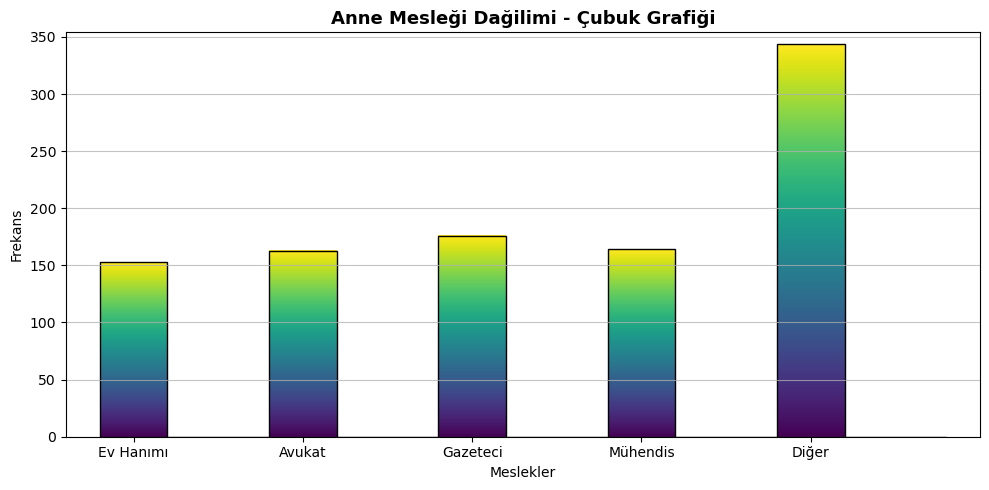

In [ ]:
# Histogram verisi ve binler
bins = [ 0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2, 4.8, 5.2, 5.8]
counts, bins = np.histogram(data['AnneMeslek'], bins=bins)

fig, ax = plt.subplots(figsize=(10, 5))

# Gradyan (dikey)
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.repeat(gradient, 2, axis=1)

# Histogram çubuklarini çiz
for i in range(len(counts)):
    left = bins[i]
    right = bins[i + 1]
    bottom = 0
    top = counts[i]

    ax.imshow(gradient,
              extent=[left, right, bottom, top],
              origin='lower',
              aspect='auto',
              cmap='viridis',
              alpha=1)

    # Kenarlik çiz
    rect = Rectangle((left, bottom), right - left, top,
                     fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Başlik ve etiketler
ax.set_title("Anne Mesleği Dağilimi - Çubuk Grafiği", fontsize=13, fontweight='bold')
ax.set_xlabel("Meslekler")
ax.set_ylabel("Frekans")
plt.xticks([1, 2, 3, 4, 5], ['Ev Hanimi', 'Avukat', 'Gazeteci', 'Mühendis', 'Diğer'])
ax.grid(axis='y', alpha=0.75)

# Sorunlari çözen ek ayarlar:
ax.set_xlim(bins[0] - 0.2, bins[-1] + 0.2)  # İlk ve son çubuğun tamami görünsün
ax.set_ylim(0, max(counts) + 10)           # Üst siniri max değerden 10 fazla yap

plt.tight_layout()
plt.show()



### d_1. Baba Mesleği Dağilimi - Eski

C:\Users\Hakan\AppData\Local\Temp\ipykernel_16284\4039273875.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(gradient,


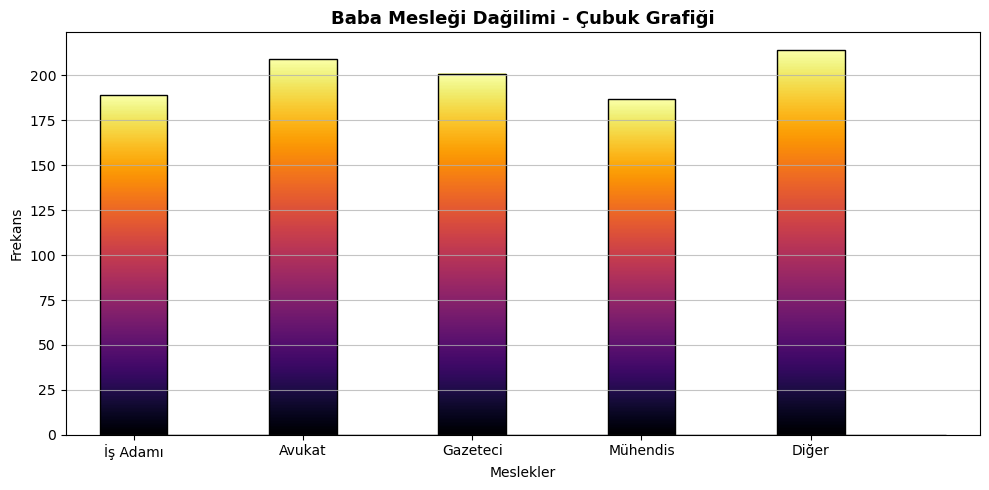

In [ ]:
# Histogram verisi ve binler
bins = [ 0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2, 4.8, 5.2, 5.8]
counts, bins = np.histogram(data['BabaMeslek'], bins=bins)

fig, ax = plt.subplots(figsize=(10, 5))

# Gradyan (dikey)
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.repeat(gradient, 2, axis=1)

# Histogram çubuklarini çiz
for i in range(len(counts)):
    left = bins[i]
    right = bins[i + 1]
    bottom = 0
    top = counts[i]

    ax.imshow(gradient,
              extent=[left, right, bottom, top],
              origin='lower',
              aspect='auto',
              cmap='inferno',
              alpha=1)

    # Kenarlik çiz
    rect = Rectangle((left, bottom), right - left, top,
                     fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Başlik ve etiketler
ax.set_title("Baba Mesleği Dağilimi - Çubuk Grafiği", fontsize=13, fontweight='bold')
ax.set_xlabel("Meslekler")
ax.set_ylabel("Frekans")
plt.xticks([1, 2, 3, 4, 5], ['İş Adami', 'Avukat', 'Gazeteci', 'Mühendis', 'Diğer'])
ax.grid(axis='y', alpha=0.75)

# Sorunlari çözen ek ayarlar:
ax.set_xlim(bins[0] - 0.2, bins[-1] + 0.2)  # İlk ve son çubuğun tamami görünsün
ax.set_ylim(0, max(counts) + 10)           # Üst siniri max değerden 10 fazla yap

plt.tight_layout()
plt.show()



### d_2. Mesleklerin Düzenlenmesi

In [539]:
meslek_1 = data[data["BabaMeslek"] == 1].index.tolist()                                     # Meslegi 1 olanlari sec.
secilecek_adet = len(meslek_1) // 5                                                         # Secilenlerin 1/5'ini sec.
degistirilecek_indeksler = random.sample(meslek_1, secilecek_adet)                          # Secilenleri rastgele sec.
data.loc[degistirilecek_indeksler, "BabaMeslek"] = 5                                        # Secilen indekslerdeki mesleklerini 5 olarak güncelle

meslek_2 = data[data["BabaMeslek"] == 2].index.tolist()                                  
secilecek_adet = len(meslek_2) // 5                                                       
degistirilecek_indeksler = random.sample(meslek_2, secilecek_adet)                       
data.loc[degistirilecek_indeksler, "BabaMeslek"] = 5                                   

meslek_3 = data[data["BabaMeslek"] == 3].index.tolist()                                  
secilecek_adet = len(meslek_3) // 5                                                   
degistirilecek_indeksler = random.sample(meslek_3, secilecek_adet)                  
data.loc[degistirilecek_indeksler, "BabaMeslek"] = 5                                      

meslek_4 = data[data["BabaMeslek"] == 4].index.tolist()                                  
secilecek_adet = len(meslek_4) // 5                                                      
degistirilecek_indeksler = random.sample(meslek_4, secilecek_adet)                        
data.loc[degistirilecek_indeksler, "BabaMeslek"] = 5                               

### d_3. Baba Mesleği Dağilimi - Yeni

In [ ]:
# Histogram verisi ve binler
bins = [ 0.8, 1.2, 1.8, 2.2, 2.8, 3.2, 3.8, 4.2, 4.8, 5.2, 5.8]
counts, bins = np.histogram(data['BabaMeslek'], bins=bins)

fig, ax = plt.subplots(figsize=(10, 5))

# Gradyan (dikey)
gradient = np.linspace(0, 1, 256).reshape(-1, 1)
gradient = np.repeat(gradient, 2, axis=1)

# Histogram çubuklarini çiz
for i in range(len(counts)):
    left = bins[i]
    right = bins[i + 1]
    bottom = 0
    top = counts[i]

    ax.imshow(gradient,
              extent=[left, right, bottom, top],
              origin='lower',
              aspect='auto',
              cmap='inferno',
              alpha=1)

    # Kenarlik çiz
    rect = Rectangle((left, bottom), right - left, top,
                     fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(rect)

# Başlik ve etiketler
ax.set_title("Baba Mesleği Dağilimi - Çubuk Grafiği", fontsize=13, fontweight='bold')
ax.set_xlabel("Meslekler")
ax.set_ylabel("Frekans")
plt.xticks([1, 2, 3, 4, 5], ['İş Adami', 'Avukat', 'Gazeteci', 'Mühendis', 'Diğer'])
ax.grid(axis='y', alpha=0.75)

# Sorunlari çözen ek ayarlar:
ax.set_xlim(bins[0] - 0.2, bins[-1] + 0.2)  # İlk ve son çubuğun tamami görünsün
ax.set_ylim(0, max(counts) + 10)           # Üst siniri max değerden 10 fazla yap

plt.tight_layout()
plt.show()



C:\Users\Hakan\AppData\Local\Temp\ipykernel_16284\4039273875.py:18: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(gradient,


### d_1. Sevilen Derslerin Yoğunluğu - Eski

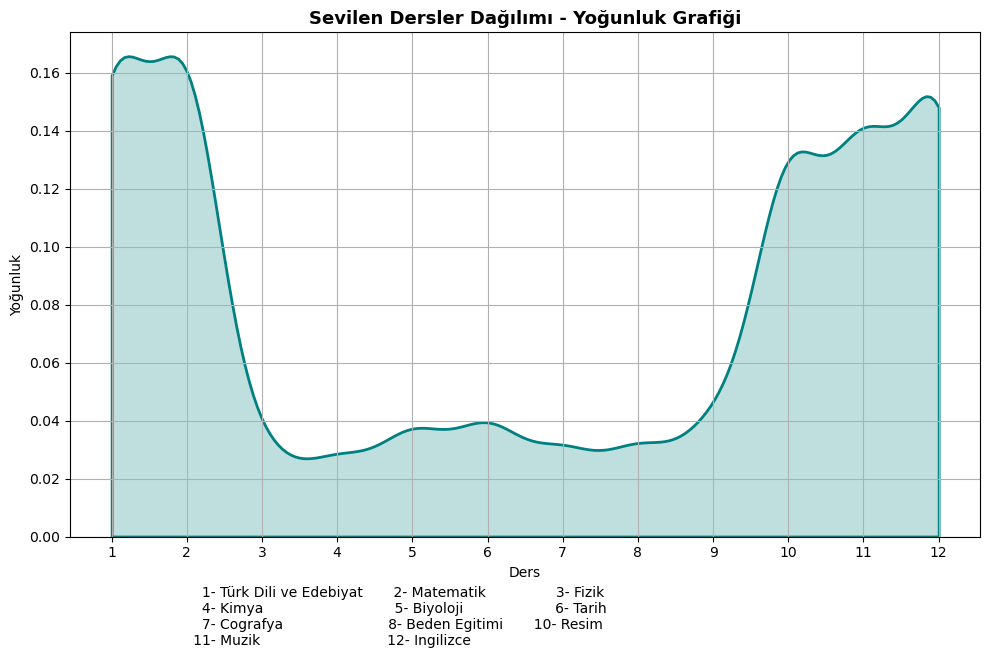

1     341
2     338
3      54
4      54
5      74
6      79
7      60
8      62
9      75
10    270
11    271
12    322
Name: count, dtype: int64


In [ ]:
# Verileri birleştir
combined = pd.concat([data["SevilenDers_1"], data["SevilenDers_2"]], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.kdeplot(combined, fill=True, color="teal", linewidth=2, bw_adjust=0.5, clip=(1, 12))

# X ekseni araliklarini tam sayilara sabitle
plt.xticks(ticks=range(1, 13), labels=[
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"
])

plt.title("Sevilen Dersler Dağilimi - Yoğunluk Grafiği", fontsize=13, fontweight='bold')
plt.xlabel("Ders")
plt.ylabel("Yoğunluk")

plt.figtext(0.15, -0.08, "             1- Türk Dili ve Edebiyat       2- Matematik                3- Fizik \n " \
"            4- Kimya                              5- Biyoloji                     6- Tarih \n" \
"             7- Cografya                        8- Beden Egitimi       10- Resim \n " \
"          11- Muzik                             12- Ingilizce"
, wrap=True, horizontalalignment='left', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

combined = pd.concat([data["SevilenDers_1"], data["SevilenDers_2"]])

# Tüm değerlerin toplam frekansini al
ders_sayilari = combined.value_counts().sort_index()

# Sonuçlari yazdir
print(ders_sayilari)

## d_2. Sevilen Derslerin Düzenlenmesi

In [ ]:
sayac = 0
while sayac < 2:
    if sayac == 0:
        sutunAdi = "SevilenDers_1"
    else:
        sutunAdi = "SevilenDers_2"

    sayac_1 = 0
    a = 1
    x = 3
    while sayac_1 < 5:
            
        Ders = data[data[sutunAdi] == a].index.tolist()                                                 # 2 olanlarin indekslerini bul
        secilecek_adet = len(Ders) // 3                                                                 # 3'te 1 oraninda kesip toplam seçilecek sayi
        degistirilecek_indeksler = random.sample(Ders, secilecek_adet)                                  # Seçilen toplam indeksi rastgele al
        adet_4 = int(secilecek_adet * 0.66)                                                             # %66 ve %33'e ayir
        adet_5 = secilecek_adet - adet_4                                                                # Kalan kismi 5 olacak
        indeks_4 = degistirilecek_indeksler[:adet_4]                                                    # İlk yüzde 66'si 4 olsun
        indeks_5 = degistirilecek_indeksler[adet_4:]                                                    # Kalan yüzde 33'ü 5 olsun
        data.loc[indeks_4, sutunAdi] = x                                                                # Değerleri güncelle
        data.loc[indeks_5, sutunAdi] = x+1

        x +=1
        if sayac_1 in (0, 2, 3, 4):
            a += 1
        else:
            a += 8
        
        sayac_1 += 1

    Ders = data[data[sutunAdi] == 12].index.tolist()                                                 # 2 olanlarin indekslerini bul
    secilecek_adet = len(Ders) // 3                                                                 # 3'te 1 oraninda kesip toplam seçilecek sayi
    degistirilecek_indeksler = random.sample(Ders, secilecek_adet)                                  # Seçilen toplam indeksi rastgele al
    data.loc[degistirilecek_indeksler, sutunAdi] = 9                                                                # Değerleri güncelle


    sayac +=1 


### d_3. Sevilen Derslerin Yoğunluğu - Yeni

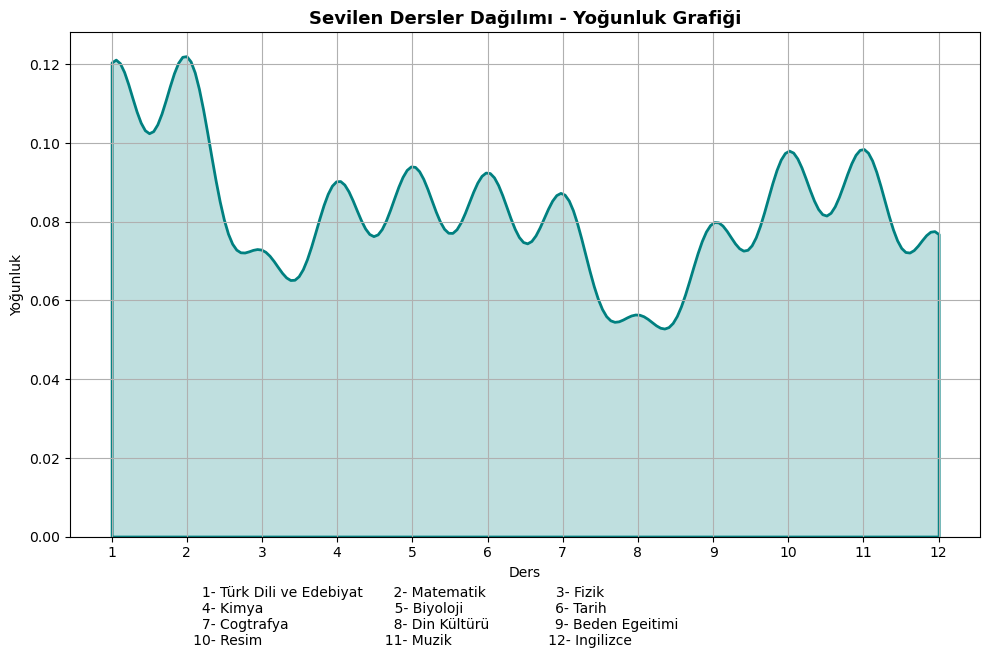

1     228
2     226
3     128
4     166
5     172
6     169
7     161
8      99
9     146
10    180
11    181
12    144
Name: count, dtype: int64


In [ ]:
# Verileri birleştir
combined = pd.concat([data["SevilenDers_1"], data["SevilenDers_2"]], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.kdeplot(combined, fill=True, color="teal", linewidth=2, bw_adjust=0.5, clip=(1, 12))

# X ekseni araliklarini tam sayilara sabitle
plt.xticks(ticks=range(1, 13), labels=[
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"
])

plt.title("Sevilen Dersler Dağilimi - Yoğunluk Grafiği", fontsize=13, fontweight='bold')
plt.xlabel("Ders")
plt.ylabel("Yoğunluk")

plt.figtext(0.15, -0.08, "             1- Türk Dili ve Edebiyat       2- Matematik                3- Fizik \n " \
"            4- Kimya                              5- Biyoloji                     6- Tarih \n" \
"             7- Cogtrafya                        8- Din Kültürü               9- Beden Egeitimi \n " \
"          10- Resim                            11- Muzik                      12- Ingilizce"
, wrap=True, horizontalalignment='left', fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

combined = pd.concat([data["SevilenDers_1"], data["SevilenDers_2"]])

# Tüm değerlerin toplam frekansini al
ders_sayilari = combined.value_counts().sort_index()

# Sonuçlari yazdir
print(ders_sayilari)

### e_1. Haftalik Ders Çalişma Saatleri - Eski

In [ ]:
# 10’luk araliklari tanimla
bins = range(0, 110, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]

# Araliklara göre gruplandir
Calisma_Aralik = pd.cut(data["DersCalisma"], bins=bins, labels=labels, right=False)

# Her aralikta kaç kişi olduğunu hesapla
aralik_sayilari = Calisma_Aralik.value_counts().sort_index()

# Sütun grafiğini çiz
plt.figure(figsize=(10, 6))
aralik_sayilari.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Haftalik Ders Çalişma Süresi Dağilimi", fontsize=13, fontweight="bold")
plt.xlabel("Ders Çalişma Süresi")
plt.ylabel("Kişi Sayisi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### e_2. Ders Saatlerinin Düzenlenmesi

In [ ]:
# 70 den büyük indeksleri bul
aralik_indeksler = data[(data["DersCalisma"] >= 60)].index.tolist()

# Yarisini rastgele seç
secilecek_adet = len(aralik_indeksler) // 2
secilen_indeksler = random.sample(aralik_indeksler, secilecek_adet)

# Seçilenlerin değerinden 30 çikar
data.loc[secilen_indeksler, "DersCalisma"] -= 40

### e_3. Haftalik Ders Çalişma Saatleri - Yeni

In [ ]:
# 10’luk araliklari tanimla
bins = range(0, 110, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]

# Araliklara göre gruplandir
Calisma_Aralik= pd.cut(data["DersCalisma"], bins=bins, labels=labels, right=False)

# Her aralikta kaç kişi olduğunu hesapla
aralik_sayilari = Calisma_Aralik.value_counts().sort_index()

# Sütun grafiğini çiz
plt.figure(figsize=(10, 6))
aralik_sayilari.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Haftalik Ders Çalişma Süresi Dağilimi", fontsize=13, fontweight="bold")
plt.xlabel("Ders Çalişma Süresi")
plt.ylabel("Kişi Sayisi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### f_1. Yillik Kitap Okuma Sayisi - Eski 

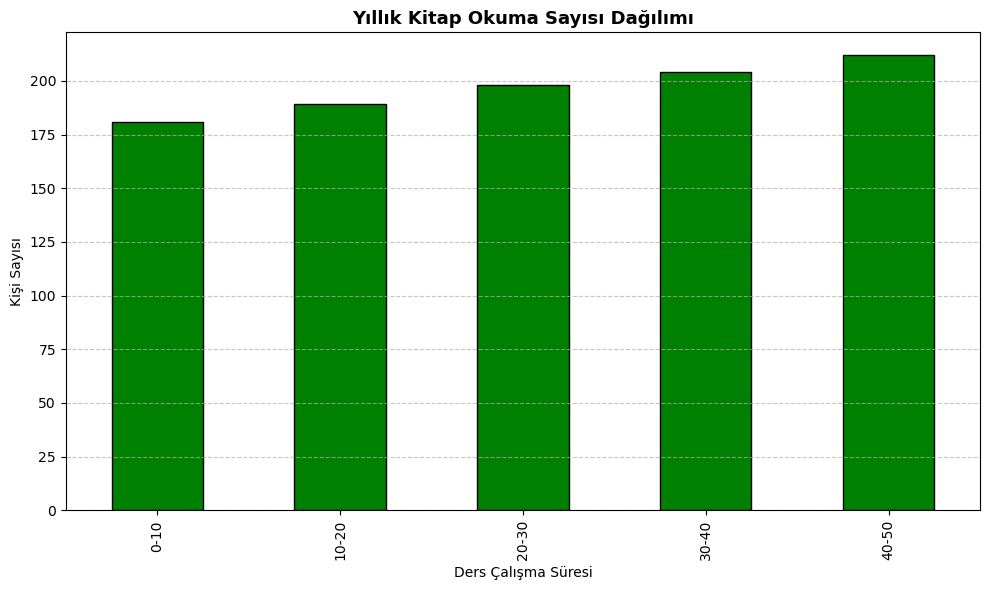

In [ ]:
# 10’luk araliklari tanimla
bins = range(0, 60, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]

# Araliklara göre gruplandir
Okuma_Aralik = pd.cut(data["KitapOkuma"], bins=bins, labels=labels, right=False)

# Her aralikta kaç kişi olduğunu hesapla
aralik_sayilari = Okuma_Aralik.value_counts().sort_index()

# Sütun grafiğini çiz
plt.figure(figsize=(10, 6))
aralik_sayilari.plot(kind="bar", color="Green", edgecolor="black")

plt.title("Yillik Kitap Okuma Sayisi Dağilimi", fontsize=13, fontweight="bold")
plt.xlabel("Ders Çalişma Süresi")
plt.ylabel("Kişi Sayisi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### f_2. Kitap Okuma Sayisinin Düzenlenmesi

In [ ]:
aralik_indeksler = data[(data["KitapOkuma"] >= 30)].index.tolist()                      # 30 dan bütük indeksleri bul

secilecek_adet = len(aralik_indeksler) // 2                                             # Yarisini rastgele seç
secilen_indeksler = random.sample(aralik_indeksler, secilecek_adet)

data.loc[secilen_indeksler, "KitapOkuma"] -= 30                                         # Seçilenlerin değerinden 30 çikar


aralik_indeksler = data[(data["KitapOkuma"] >= 40)].index.tolist()                      # 40 dan bütük indeksleri bul

secilecek_adet = len(aralik_indeksler) // 2
secilen_indeksler = random.sample(aralik_indeksler, secilecek_adet)

data.loc[secilen_indeksler, "KitapOkuma"] -= 40

### f_3. Yillik Kitap Okuma Sayisi - Yeni

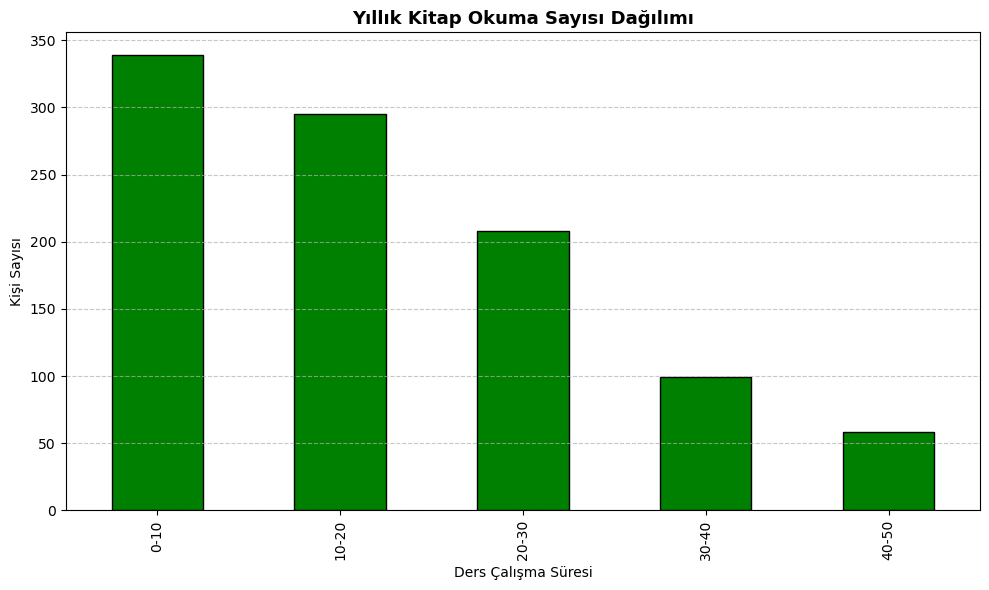

In [ ]:
# 10’luk araliklari tanimla
bins = range(0, 60, 10)
labels = [f"{i}-{i+10}" for i in bins[:-1]]

# Araliklara göre gruplandir
Okuma_Aralik = pd.cut(data["KitapOkuma"], bins=bins, labels=labels, right=False)

# Her aralikta kaç kişi olduğunu hesapla
aralik_sayilari = Okuma_Aralik.value_counts().sort_index()

# Sütun grafiğini çiz
plt.figure(figsize=(10, 6))
aralik_sayilari.plot(kind="bar", color="Green", edgecolor="black")

plt.title("Yillik Kitap Okuma Sayisi Dağilimi", fontsize=13, fontweight="bold")
plt.xlabel("Ders Çalişma Süresi")
plt.ylabel("Kişi Sayisi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### g_1. Etkinlik Katilim Dağilimi - Eski

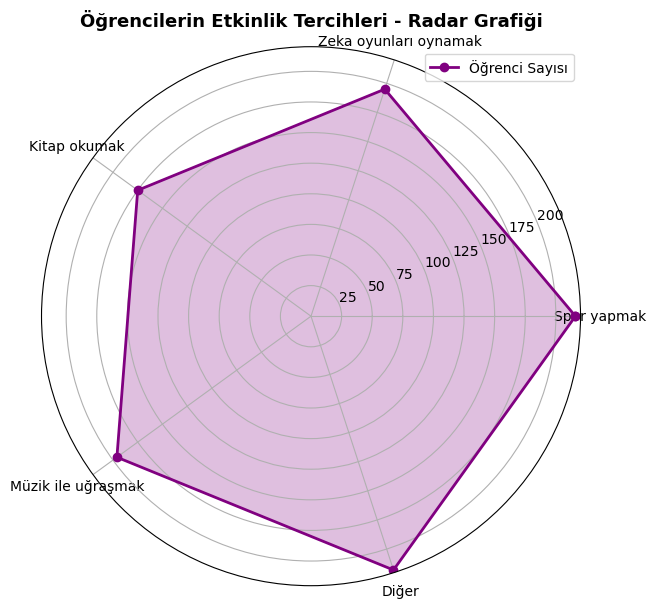

In [ ]:
# Etkinlik frekanslarini hesapla
counts = data['Etkinlik'].value_counts().sort_index()

# Etkinlik isimleri (index 1-5)
etkinlikler = [
    "Spor yapmak",
    "Zeka oyunlari oynamak",
    "Kitap okumak",
    "Müzik ile uğraşmak",
    "Diğer"
]

# Eğer bazi etkinlik sayilari eksikse onlari 0 yapalim (örneğin veri 1,2,4 var ama 3 yoksa)
# Böylece eksik etkinlik sayisi da radar grafikte gösterilir
counts = counts.reindex(range(1, 6), fill_value=0)

# Radar grafiği için açilari hesapla
num_etkinlik = len(etkinlikler)
angles = np.linspace(0, 2 * np.pi, num_etkinlik, endpoint=False).tolist()

# Veri kapanacak şekilde ilk değeri sona ekle
values = counts.values.tolist()
values += values[:1]
angles += angles[:1]

# Grafik oluştur
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Radar grafiğini çiz
ax.plot(angles, values, 'o-', linewidth=2, color='purple', label='Öğrenci Sayisi')
ax.fill(angles, values, color='purple', alpha=0.25)

# Etiketleri ayarla
ax.set_thetagrids(np.degrees(angles[:-1]), etkinlikler, fontsize=10)

# Başlik ve grid
plt.title("Öğrencilerin Etkinlik Tercihleri - Radar Grafiği", fontsize=13, fontweight='bold')
ax.grid(True)

plt.legend(loc='upper right')
plt.show()


### g_2. Etkinlik Katilim Sayisinin Düzenlenmesi

In [551]:
meslek_1 = data[data["Etkinlik"] == 1].index.tolist()                                       # Etkinliği 1 olanlari sec.
secilecek_adet = len(meslek_1) // 5                                                         # Secilenlerin 1/5'ini sec.
degistirilecek_indeksler = random.sample(meslek_1, secilecek_adet)                          # Secilenleri rastgele sec.
data.loc[degistirilecek_indeksler, "Etkinlik"] = 5                                          # Secilen indekslerdeki etkinliklerini 5 olarak güncelle

meslek_2 = data[data["Etkinlik"] == 2].index.tolist()                                  
secilecek_adet = len(meslek_2) // 5                                                       
degistirilecek_indeksler = random.sample(meslek_2, secilecek_adet)                       
data.loc[degistirilecek_indeksler, "Etkinlik"] = 5                                   

meslek_3 = data[data["Etkinlik"] == 3].index.tolist()                                  
secilecek_adet = len(meslek_3) // 5                                                   
degistirilecek_indeksler = random.sample(meslek_3, secilecek_adet)                  
data.loc[degistirilecek_indeksler, "Etkinlik"] = 5                                      

meslek_4 = data[data["Etkinlik"] == 4].index.tolist()                                  
secilecek_adet = len(meslek_4) // 5                                                      
degistirilecek_indeksler = random.sample(meslek_4, secilecek_adet)                        
data.loc[degistirilecek_indeksler, "Etkinlik"] = 5    

### g_3. Etkinlik Katilim Dağilimi - Yeni

In [ ]:
# Etkinlik frekanslarini hesapla
counts = data['Etkinlik'].value_counts().sort_index()

# Etkinlik isimleri (index 1-5)
etkinlikler = [
    "Spor yapmak",
    "Zeka oyunlari oynamak",
    "Kitap okumak",
    "Müzik ile uğraşmak",
    "Diğer"
]

# Eğer bazi etkinlik sayilari eksikse onlari 0 yapalim (örneğin veri 1,2,4 var ama 3 yoksa)
# Böylece eksik etkinlik sayisi da radar grafikte gösterilir
counts = counts.reindex(range(1, 6), fill_value=0)

# Radar grafiği için açilari hesapla
num_etkinlik = len(etkinlikler)
angles = np.linspace(0, 2 * np.pi, num_etkinlik, endpoint=False).tolist()

# Veri kapanacak şekilde ilk değeri sona ekle
values = counts.values.tolist()
values += values[:1]
angles += angles[:1]

# Grafik oluştur
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Radar grafiğini çiz
ax.plot(angles, values, 'o-', linewidth=2, color='purple', label='Öğrenci Sayisi')
ax.fill(angles, values, color='purple', alpha=0.25)

# Etiketleri ayarla
ax.set_thetagrids(np.degrees(angles[:-1]), etkinlikler, fontsize=10)

# Başlik ve grid
plt.title("Öğrencilerin Etkinlik Tercihleri - Radar Grafiği", fontsize=13, fontweight='bold')
ax.grid(True)

plt.legend(loc='upper right')
plt.show()

### h_1. Anne Mesleğine Göre Lise Dersleri Dağilimi - Eski

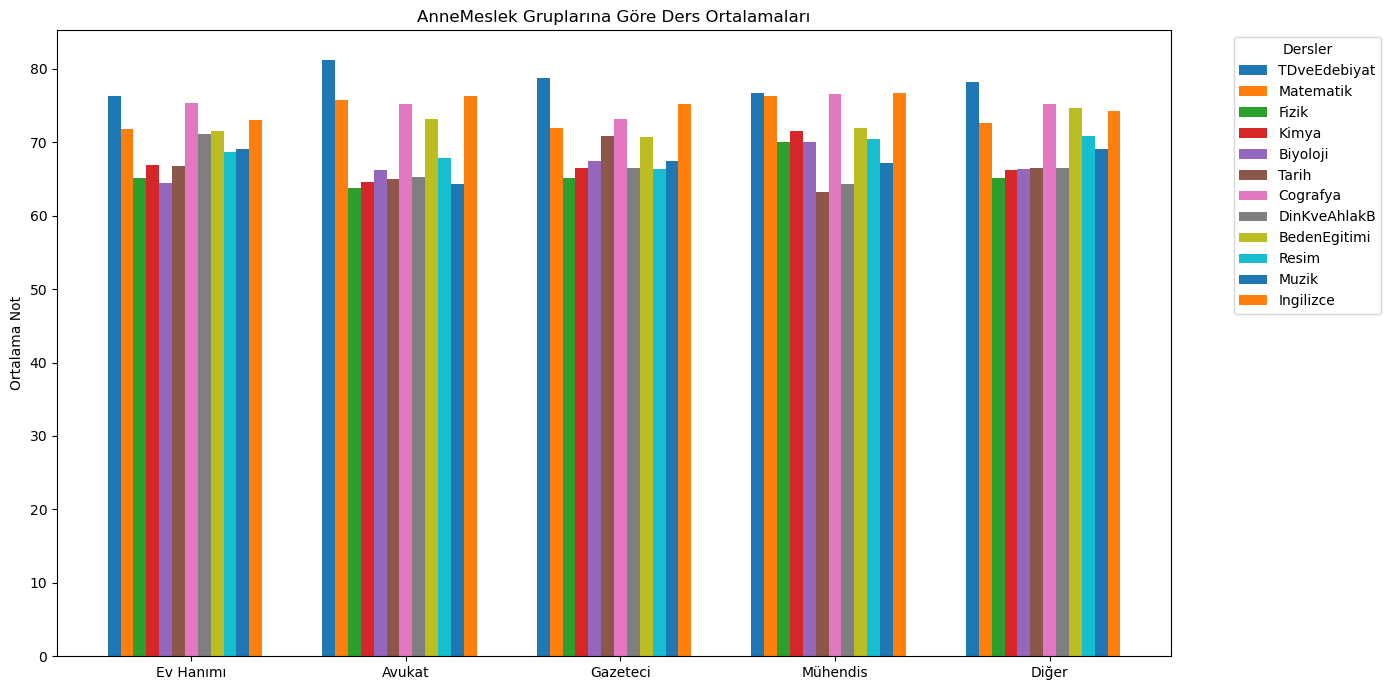

In [ ]:

# Ders adlari
Lise_Dersler = ["TDveEdebiyat", "Matematik", "Fizik", "Kimya", "Biyoloji", "Tarih",
           "Cografya", "DinKveAhlakB", "BedenEgitimi", "Resim", "Muzik", "Ingilizce"]

# AnneMeslek'e göre ders ortalamalari
ortalama_df = data.groupby("AnneMeslek")[Lise_Dersler].mean()

# X pozisyonlari (AnneMeslek sayisi kadar)
x = np.arange(len(ortalama_df.index))  # [0,1,2,3,4] için

# Bar genişliği
bar_genislik = 0.06

# Grafik başlat
fig, ax = plt.subplots(figsize=(14, 7))

# Her dersi çiz
for i, ders in enumerate(Lise_Dersler):
    ax.bar(x + i*bar_genislik, ortalama_df[ders], width=bar_genislik, label=ders)

# X ekseni ayarlari
ax.set_xticks(x + (len(Lise_Dersler)/2)*bar_genislik)
ax.set_xticklabels(["Ev Hanimi", "Avukat", "Gazeteci", "Mühendis", "Diğer"])


# Eksen etiketleri ve başlik
ax.set_ylabel("Ortalama Not")
ax.set_title("AnneMeslek Gruplarina Göre Ders Ortalamalari")
ax.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### h_2. Düzenleme

In [ ]:
filtre = data["AnneMeslek"] == 1                                                # AnneMeslek değeri 1 olanlari filtrele
eklencek_dersler = ["DinKveAhlakB", "BedenEgitimi", "Resim","Muzik"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["TDveEdebiyat","Matematik","Fizik","Kimya","Biyoloji","Tarih","Cografya","Ingilizce"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["AnneMeslek"] == 2                                                # AnneMeslek değeri 1 olanlari filtrele
eklencek_dersler = ["TDveEdebiyat", "Matematik", "Ingilizce"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["DinKveAhlakB","BedenEgitimi", "Resim","Muzik" ,"Fizik","Kimya","Biyoloji","Tarih","Cografya"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["AnneMeslek"] == 3                                               # AnneMeslek değeri 1 olanlari filtrele
eklencek_dersler = ["TDveEdebiyat", "Resim","Muzik","Tarih","Cografya"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["DinKveAhlakB","BedenEgitimi" ,"Fizik","Kimya","Biyoloji", "Matematik", "Ingilizce"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["AnneMeslek"] == 4                                                # AnneMeslek değeri 1 olanlari filtrele
eklencek_dersler = [ "Matematik","Kimya","Biyoloji", "Ingilizce"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["TDveEdebiyat","DinKveAhlakB","BedenEgitimi", "Resim","Muzik" ,"Fizik","Tarih","Cografya"]
data.loc[filtre, cikarilcak_dersler] -= 10


# Tüm dersleri 0-100 araliğinda tut
data[Lise_Dersler] = data[Lise_Dersler].clip(lower=0, upper=100)

### h_3. Anne Mesleğine Göre Lise Dersleri Dağilimi - Yeni

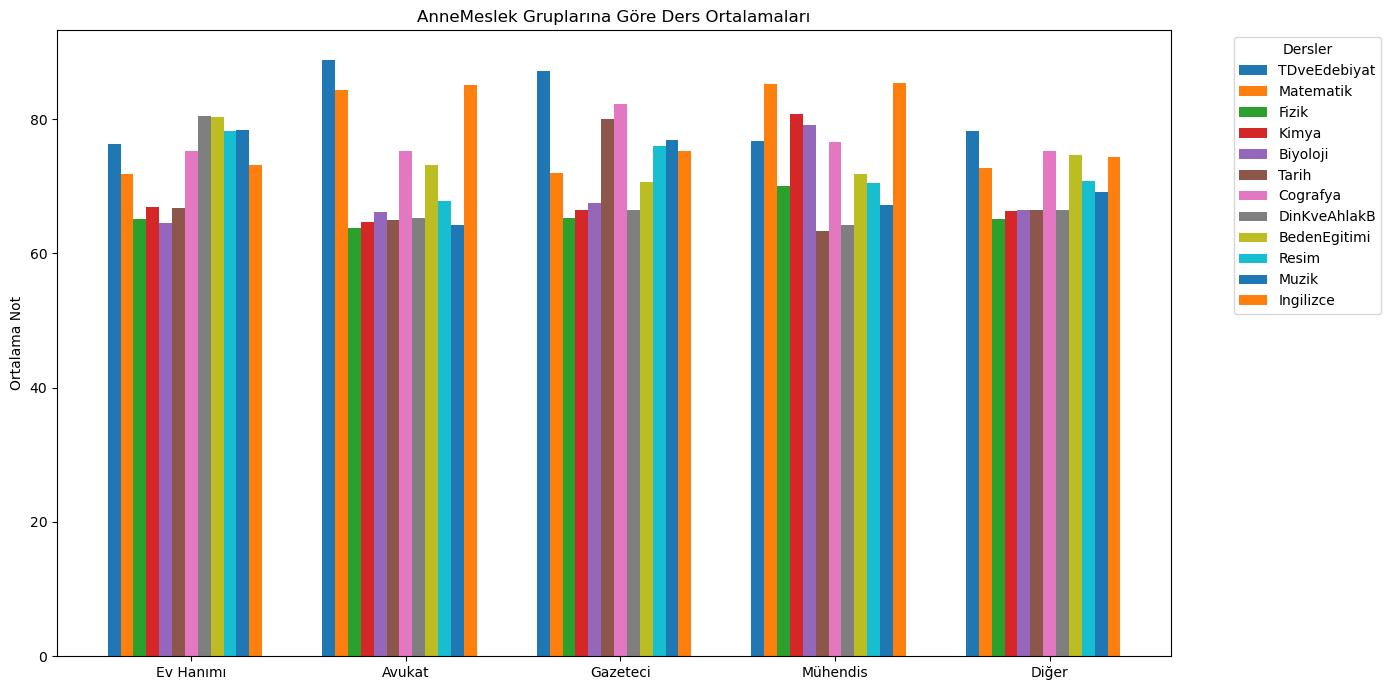

In [ ]:
# AnneMeslek'e göre ders ortalamalari
ortalama_df = data.groupby("AnneMeslek")[Lise_Dersler].mean()

# X pozisyonlari (AnneMeslek sayisi kadar)
x = np.arange(len(ortalama_df.index))  # [0,1,2,3,4] için

# Bar genişliği
bar_genislik = 0.06

# Grafik başlat
fig, ax = plt.subplots(figsize=(14, 7))

# Her dersi çiz
for i, ders in enumerate(Lise_Dersler):
    ax.bar(x + i*bar_genislik, ortalama_df[ders], width=bar_genislik, label=ders)

# X ekseni ayarlari
ax.set_xticks(x + (len(Lise_Dersler)/2)*bar_genislik)
ax.set_xticklabels(["Ev Hanimi", "Avukat", "Gazeteci", "Mühendis", "Diğer"])


# Eksen etiketleri ve başlik
ax.set_ylabel("Ortalama Not")
ax.set_title("AnneMeslek Gruplarina Göre Ders Ortalamalari")
ax.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### i_1. Baba Mesleğine Göre Lise Dersleri Dağilimi - Eski

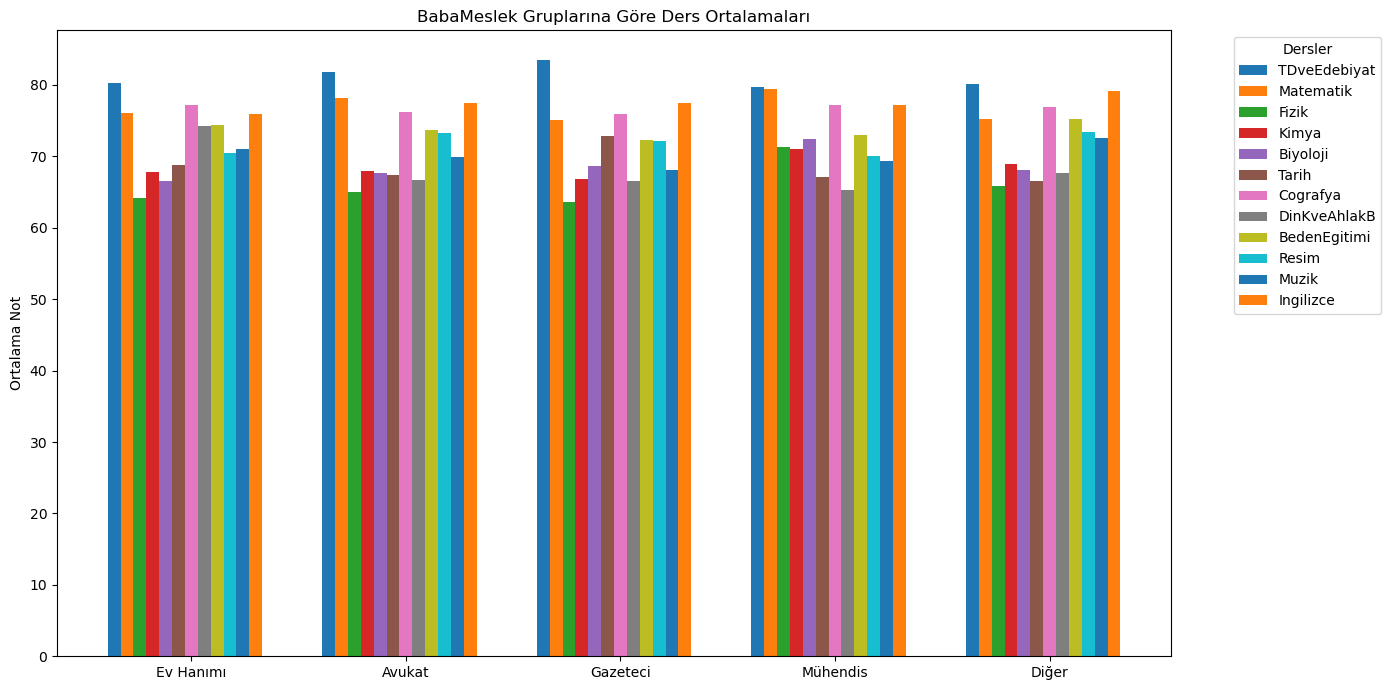

In [ ]:
# BabaMeslek'e göre ders ortalamalari
ortalama_df = data.groupby("BabaMeslek")[Lise_Dersler].mean()

# X pozisyonlari (BabaMeslek sayisi kadar)
x = np.arange(len(ortalama_df.index))  # [0,1,2,3,4] için

# Bar genişliği
bar_genislik = 0.06

# Grafik başlat
fig, ax = plt.subplots(figsize=(14, 7))

# Her dersi çiz
for i, ders in enumerate(Lise_Dersler):
    ax.bar(x + i*bar_genislik, ortalama_df[ders], width=bar_genislik, label=ders)

# X ekseni ayarlari
ax.set_xticks(x + (len(Lise_Dersler)/2)*bar_genislik)
ax.set_xticklabels(["Ev Hanimi", "Avukat", "Gazeteci", "Mühendis", "Diğer"])


# Eksen etiketleri ve başlik
ax.set_ylabel("Ortalama Not")
ax.set_title("BabaMeslek Gruplarina Göre Ders Ortalamalari")
ax.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### i_2. Düzenleme

In [ ]:
filtre = data["BabaMeslek"] == 1                                                # BabaMeslek değeri 1 olanlari filtrele
eklencek_dersler = [ "BedenEgitimi","Ingilizce"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["DinKveAhlakB","TDveEdebiyat","Matematik","Fizik","Kimya","Biyoloji","Tarih", "Muzik", "Resim", "Cografya"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["BabaMeslek"] == 2                                                # BabaMeslek değeri 2 olanlari filtrele
eklencek_dersler = ["TDveEdebiyat", "Matematik", "Ingilizce"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["DinKveAhlakB","BedenEgitimi", "Resim","Muzik" ,"Fizik","Kimya","Biyoloji","Tarih","Cografya"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["BabaMeslek"] == 3                                               # BabaMeslek değeri 3 olanlari filtrele
eklencek_dersler = ["TDveEdebiyat", "Resim","Muzik","Tarih","Cografya"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["DinKveAhlakB","BedenEgitimi" ,"Fizik","Kimya","Biyoloji", "Matematik", "Ingilizce"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["BabaMeslek"] == 4                                                # BabaMeslek değeri 4 olanlari filtrele
eklencek_dersler = [ "Matematik","Kimya","Biyoloji", "Ingilizce"]
data.loc[filtre, Lise_Dersler] += 10
cikarilcak_dersler = ["TDveEdebiyat","DinKveAhlakB","BedenEgitimi", "Resim","Muzik" ,"Fizik","Tarih","Cografya"]
data.loc[filtre, cikarilcak_dersler] -= 10

# Tüm dersleri 0-100 araliğinda tut
data[Lise_Dersler] = data[Lise_Dersler].clip(lower=0, upper=100)

### i_3. Baba Mesleğine Göre Lise Dersleri Dağilimi - Yeni

In [ ]:
# BabaMeslek'e göre ders ortalamalari
ortalama_df = data.groupby("BabaMeslek")[Lise_Dersler].mean()

# X pozisyonlari (BabaMeslek sayisi kadar)
x = np.arange(len(ortalama_df.index))  # [0,1,2,3,4] için

# Bar genişliği
bar_genislik = 0.06

# Grafik başlat
fig, ax = plt.subplots(figsize=(14, 7))

# Her dersi çiz
for i, ders in enumerate(Lise_Dersler):
    ax.bar(x + i*bar_genislik, ortalama_df[ders], width=bar_genislik, label=ders)

# X ekseni ayarlari
ax.set_xticks(x + (len(Lise_Dersler)/2)*bar_genislik)
ax.set_xticklabels(["Ev Hanimi", "Avukat", "Gazeteci", "Mühendis", "Diğer"])


# Eksen etiketleri ve başlik
ax.set_ylabel("Ortalama Not")
ax.set_title("BabaMeslek Gruplarina Göre Ders Ortalamalari")
ax.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### j. Sevilen Derslere Göre Lise Derslerinin Düzenlenmesi

In [ ]:
# +6 verilecek dersler SevilenDers_1 değerine göre eşleşiyor
favori_dersler = {
    1: "TDveEdebiyat",
    2: "Matematik",
    3: "Fizik",
    4: "Kimya",
    5: "Biyoloji",
    6: "Tarih",
    7: "Cografya",
    8: "DinKveAhlakB",
    9: "BedenEgitimi",
    10: "Resim",
    11: "Muzik",
    12: "Ingilizce"
}


for sevilen, favori in favori_dersler.items():
    filtre = data["SevilenDers_1"] == sevilen
    data.loc[filtre, favori] += 6  # Favori derse +6

    # Diğer tüm derslere -6 uygula
    diger_dersler = [d for d in Lise_Dersler if d != favori]
    data.loc[filtre, diger_dersler] -= 6

for sevilen, favori in favori_dersler.items():
    filtre = data["SevilenDers_2"] == sevilen
    data.loc[filtre, favori] += 6  # Favori derse +6

    # Diğer tüm derslere -6 uygula
    diger_dersler = [d for d in Lise_Dersler if d != favori]
    data.loc[filtre, diger_dersler] -= 6

# Tüm değerleri 0-100 arasinda sinirla
data[Lise_Dersler] = data[Lise_Dersler].clip(0, 100)

data.index = range(1, len(data) + 1)

### k_1. Özel Ders Alan-Almayan Karşilaştirilmasi - Eski

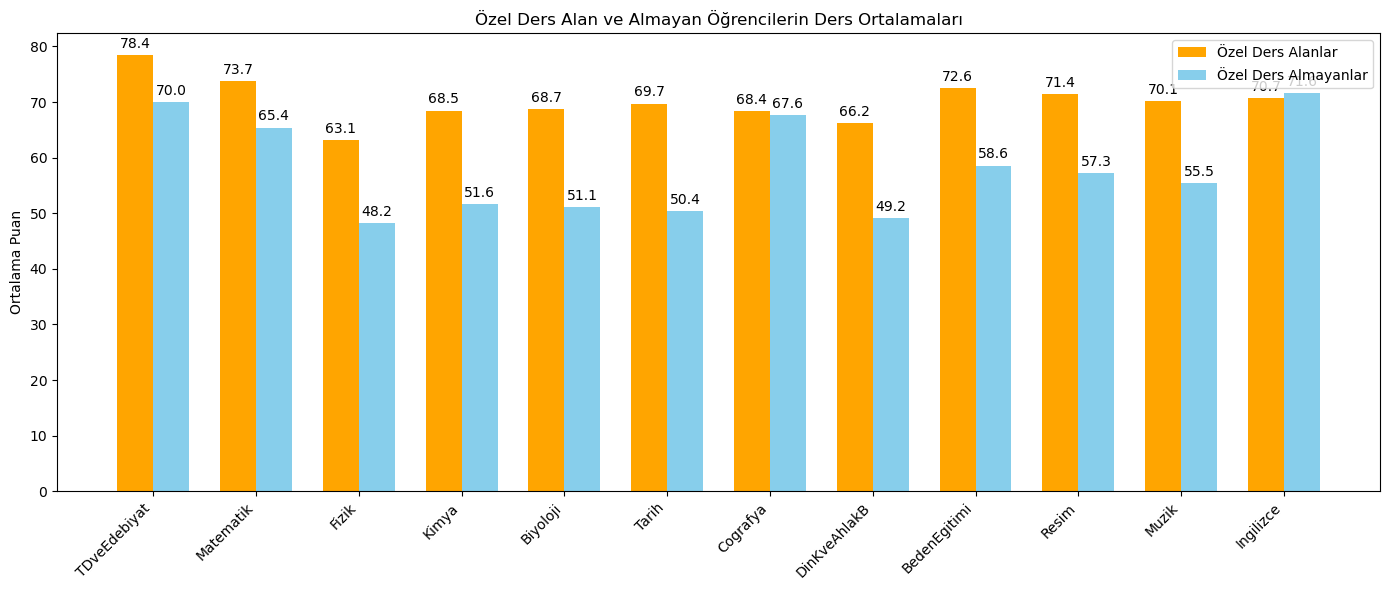

In [ ]:
# Her grup için ortalama değerleri hesapla
ozel_ders_1 = data[data["OzelDers"] == 1][Lise_Dersler].mean()
ozel_ders_0 = data[data["OzelDers"] == 0][Lise_Dersler].mean()

# Grafik için pozisyonlar
x = np.arange(len(Lise_Dersler))
width = 0.35  # sütun genişliği

# Grafik çizimi
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, ozel_ders_1, width, label='Özel Ders Alanlar', color='orange')
bars2 = ax.bar(x + width/2, ozel_ders_0, width, label='Özel Ders Almayanlar', color='skyblue')

# Etiketler ve başlik
ax.set_ylabel('Ortalama Puan')
ax.set_title('Özel Ders Alan ve Almayan Öğrencilerin Ders Ortalamalari')
ax.set_xticks(x)
ax.set_xticklabels(Lise_Dersler, rotation=45, ha='right')
ax.legend()

# Değerleri bar üzerine yaz
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

### k_2. Düzenleme

In [ ]:
# Koşullu olarak 12 ekle veya çikar
data[Lise_Dersler] += data["OzelDers"].apply(lambda x: 3 if x == 1 else -3).values[:, None]

# Değerleri 0-100 araliğinda sinirla
data[Lise_Dersler] = data[Lise_Dersler].clip(0, 100)


### k_3. Özel Ders Alan-Almayan Karşilaştirilmasi - Yeni

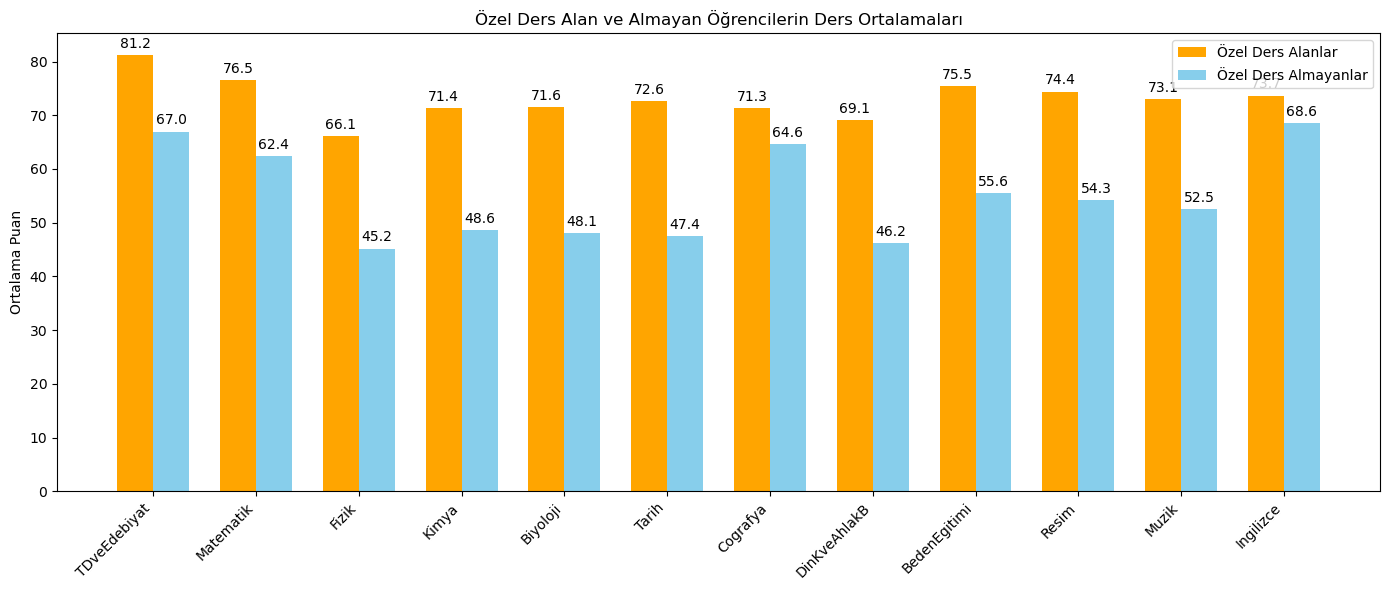

In [ ]:
# Her grup için ortalama değerleri hesapla
ozel_ders_1 = data[data["OzelDers"] == 1][Lise_Dersler].mean()
ozel_ders_0 = data[data["OzelDers"] == 0][Lise_Dersler].mean()

# Grafik için pozisyonlar
x = np.arange(len(Lise_Dersler))
width = 0.35  # sütun genişliği

# Grafik çizimi
fig, ax = plt.subplots(figsize=(14, 6))
bars1 = ax.bar(x - width/2, ozel_ders_1, width, label='Özel Ders Alanlar', color='orange')
bars2 = ax.bar(x + width/2, ozel_ders_0, width, label='Özel Ders Almayanlar', color='skyblue')

# Etiketler ve başlik
ax.set_ylabel('Ortalama Puan')
ax.set_title('Özel Ders Alan ve Almayan Öğrencilerin Ders Ortalamalari')
ax.set_xticks(x)
ax.set_xticklabels(Lise_Dersler, rotation=45, ha='right')
ax.legend()

# Değerleri bar üzerine yaz
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

### l_1. Haftalik Ders Çalişma Saatlerine Göre Ders Notlari - Eski

In [ ]:
df = data.copy()
df["DersCalisma"] = df["DersCalisma"].astype(int)                                                       # Fazla kusuratli olmasinlar

grouped = df.groupby("DersCalisma")[Lise_Dersler].mean()                                                     # Ortalama notlari haftalik çalişma süresine göre gruplayalim

grouped.plot(kind="line", figsize=(15, 7), marker='o')                                                  # Cizgi grafigi cizelim
plt.title("Haftalik Ders Çalisma Suresine Göre Ortalama Ders Notlari - Çizgi Grafiği", fontsize=13, fontweight='bold')
plt.xlabel("Haftalik Ders Calisma Suresi (saat)")
plt.ylabel("Ortalama Not")
plt.grid(True)
plt.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### l_2. Düzenleme

In [ ]:
filtre_1 = (data["DersCalisma"] >= 0) & (data["DersCalisma"] < 20)                                                                  # 0-20 arasi → -6
data.loc[filtre_1, Lise_Dersler] -= 10

filtre_2 = (data["DersCalisma"] >= 20) & (data["DersCalisma"] < 40)                                                                 # 20-40 arasi → -3
data.loc[filtre_2, Lise_Dersler] -= 5

filtre_4 = (data["DersCalisma"] >= 60) & (data["DersCalisma"] < 80)                                                                 # 60-80 arasi → +3
data.loc[filtre_4, Lise_Dersler] += 5

filtre_5 = (data["DersCalisma"] >= 80) & (data["DersCalisma"] <= 100)                                                               # 80-100 arasi → +6
data.loc[filtre_5, Lise_Dersler] += 10

data[Lise_Dersler] = data[Lise_Dersler].clip(lower=0, upper=100)                                                                    # Tüm dersleri 0-100 araliğinda tut

### l. Haftalik Ders Çalişma Saatlerine Göre Ders Notlari - Yeni

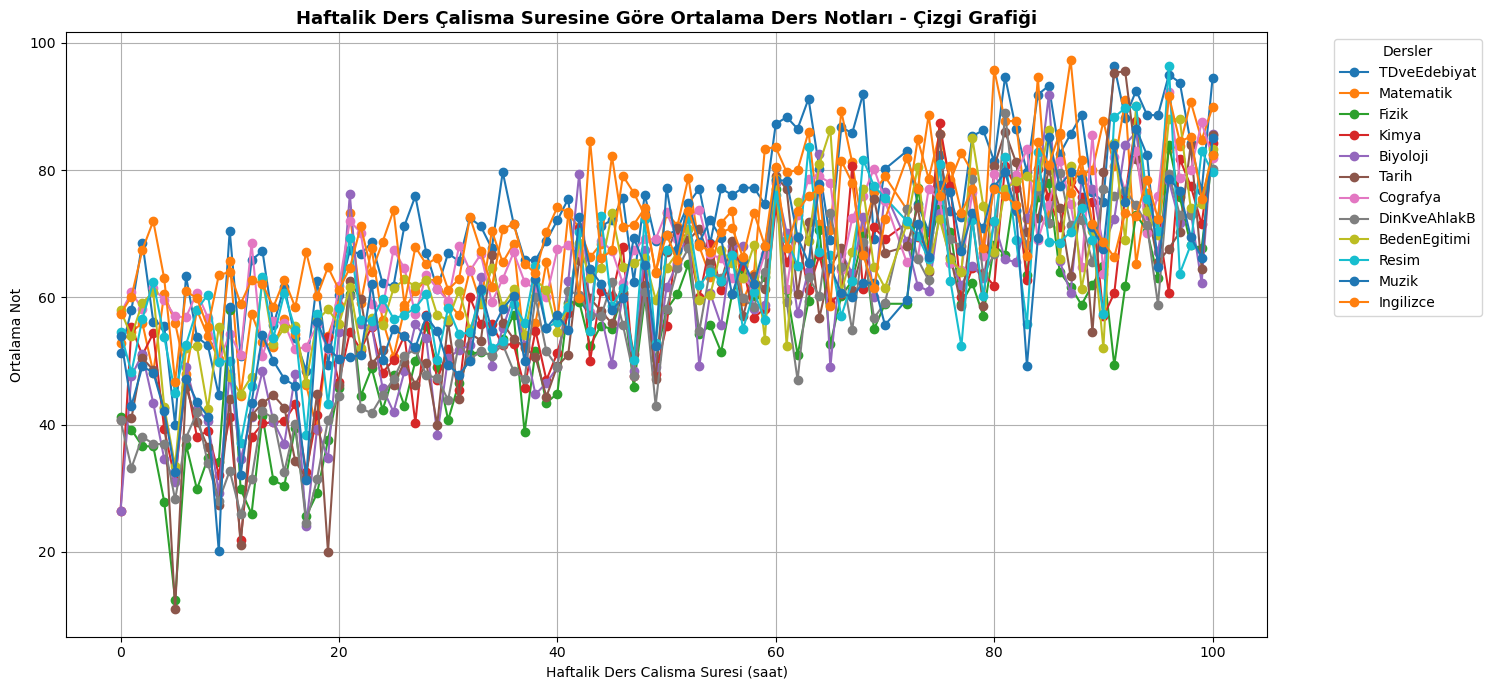

In [ ]:
df = data.copy()
df["DersCalisma"] = df["DersCalisma"].astype(int)                                                       # Fazla kusuratli olmasinlar

grouped = df.groupby("DersCalisma")[Lise_Dersler].mean()                                                # Ortalama notlari haftalik çalişma süresine göre gruplayalim

grouped.plot(kind="line", figsize=(15, 7), marker='o')                                                  # Cizgi grafigi cizelim
plt.title("Haftalik Ders Çalisma Suresine Göre Ortalama Ders Notlari - Çizgi Grafiği", fontsize=13, fontweight='bold')
plt.xlabel("Haftalik Ders Calisma Suresi (saat)")
plt.ylabel("Ortalama Not")
plt.grid(True)
plt.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### m_1. Yillik Kitap Okuma Sayisina Göre Ders Notlari - Eski

In [ ]:
df = data.copy()
df["KitapOkuma"] = df["KitapOkuma"].astype(int)                                                         # Fazla kusuratli olmasinlar

grouped = df.groupby("KitapOkuma")[Lise_Dersler].mean()                                                      # Ortalama notlari haftalik kitap okuma sayisina göre gruplayalim

grouped.plot(kind="line", figsize=(15, 7), marker='o')                                                  # Cizgi grafigi cizelim
plt.title("Yillik Kitap Okuma Sayisina Göre Ortalama Ders Notlari - Çizgi Grafiği", fontsize=13, fontweight='bold')
plt.xlabel("Yillik Kitap Okuma Sayisi")
plt.ylabel("Ortalama Not")
plt.grid(True)
plt.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### m_2. Düzenleme

In [ ]:
filtre_1 = (data["KitapOkuma"] >= 0) & (data["KitapOkuma"] < 10)                                                                  # 0-10 arasi → -6
data.loc[filtre_1, Lise_Dersler] -= 6
data.loc[filtre_1, "TDveEdebiyat"] -= 6                                                                                           # Edebiyat dersi icin daha onemli oldugundan ona ayriyeten ek

filtre_2 = (data["KitapOkuma"] >= 10) & (data["KitapOkuma"] < 20)                                                                 # 10-20 arasi → -3
data.loc[filtre_2, Lise_Dersler] -= 3
data.loc[filtre_2, "TDveEdebiyat"] -= 3

filtre_3 = (data["KitapOkuma"] >= 30) & (data["KitapOkuma"] <= 40)                                                                # 20-30 arasi → +6
data.loc[filtre_3, Lise_Dersler] += 3
data.loc[filtre_3, "TDveEdebiyat"] -= 3

filtre_4 = (data["KitapOkuma"] >= 30) & (data["KitapOkuma"] <= 40)                                                                # 30-40 arasi → +6
data.loc[filtre_4, Lise_Dersler] += 5
data.loc[filtre_4, "TDveEdebiyat"] -= 5

filtre_5 = (data["KitapOkuma"] >= 40) & (data["KitapOkuma"] <= 50)                                                                # 40-50 arasi → +6
data.loc[filtre_5, Lise_Dersler] += 8
data.loc[filtre_5, "TDveEdebiyat"] -= 8

data[Lise_Dersler] = data[Lise_Dersler].clip(lower=0, upper=100) 

### m_3. Yillik Kitap Okuma Sayisina Göre Ders Notlari - Yeni

In [ ]:
df = data.copy()
df["KitapOkuma"] = df["KitapOkuma"].astype(int)                                                         # Fazla kusuratli olmasinlar

grouped = df.groupby("KitapOkuma")[Lise_Dersler].mean()                                                      # Ortalama notlari haftalik kitap okuma sayisina göre gruplayalim

grouped.plot(kind="line", figsize=(15, 7), marker='o')                                                  # Cizgi grafigi cizelim
plt.title("Yillik Kitap Okuma Sayisina Göre Ortalama Ders Notlari - Çizgi Grafiği", fontsize=13, fontweight='bold')
plt.xlabel("Yillik Kitap Okuma Sayisi")
plt.ylabel("Ortalama Not")
plt.grid(True)
plt.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### n_1. Etkinliklere Göre Ders Notlari Dağilimi - Eski

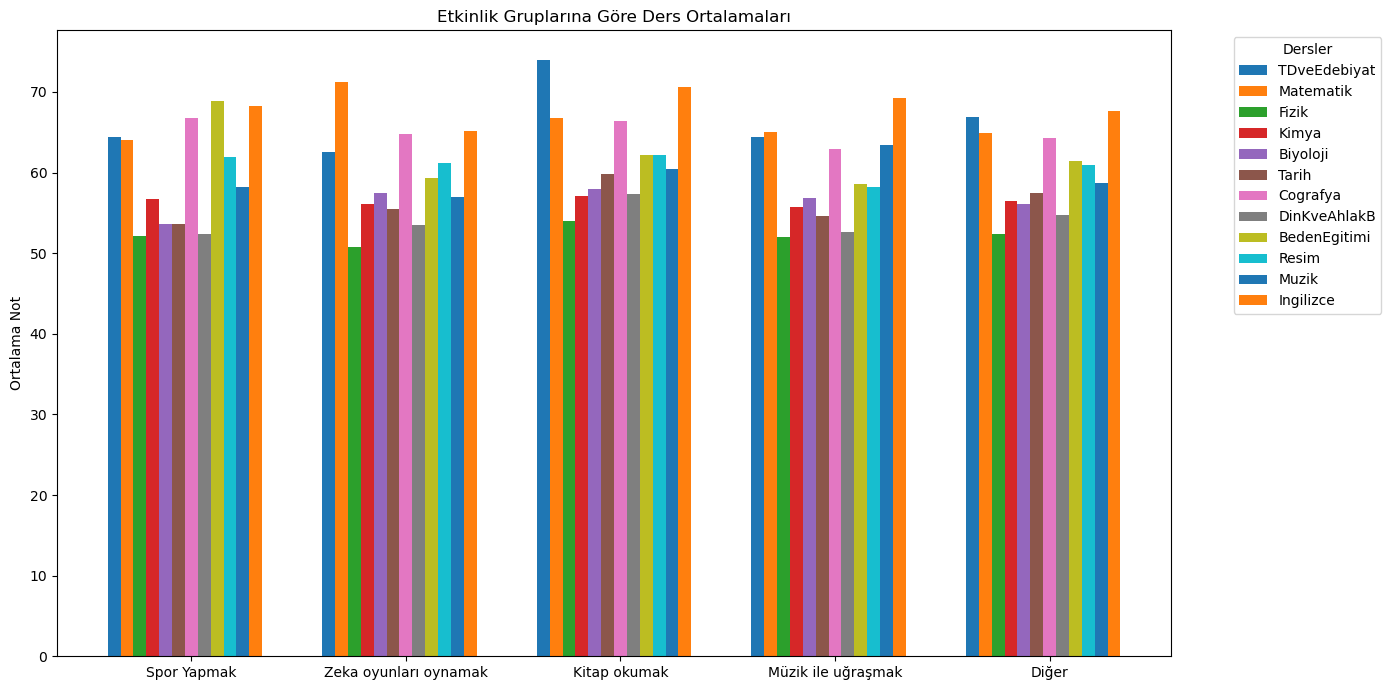

In [ ]:
# Etkinlik'e göre ders ortalamalari
ortalama_df = data.groupby("Etkinlik")[Lise_Dersler].mean()

# X pozisyonlari (Etkinlik sayisi kadar)
x = np.arange(len(ortalama_df.index))  # [0,1,2,3,4] için

# Bar genişliği
bar_genislik = 0.06

# Grafik başlat
fig, ax = plt.subplots(figsize=(14, 7))

# Her dersi çiz
for i, ders in enumerate(Lise_Dersler):
    ax.bar(x + i*bar_genislik, ortalama_df[ders], width=bar_genislik, label=ders)

# X ekseni ayarlari
ax.set_xticks(x + (len(Lise_Dersler)/2)*bar_genislik)
ax.set_xticklabels(["Spor Yapmak", "Zeka oyunlari oynamak", "Kitap okumak", "Müzik ile uğraşmak", "Diğer"])


# Eksen etiketleri ve başlik
ax.set_ylabel("Ortalama Not")
ax.set_title("Etkinlik Gruplarina Göre Ders Ortalamalari")
ax.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### n_2. Düzenleme

In [ ]:
filtre = data["Etkinlik"] == 1                                                                      # Etkinlik değeri 1 olanlari filtrele
eklencek_dersler = [ "BedenEgitimi"]
data.loc[filtre, Lise_Dersler] += 15
cikarilcak_dersler = ["DinKveAhlakB","TDveEdebiyat","Matematik","Fizik","Kimya","Biyoloji","Tarih", "Muzik", "Resim", "Cografya","Ingilizce"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["Etkinlik"] == 2                                                                      # Etkinlik değeri 2 olanlari filtrele
eklencek_dersler = [ "Matematik", "Resim","Muzik"]
data.loc[filtre, Lise_Dersler] += 15
cikarilcak_dersler = ["TDveEdebiyat","DinKveAhlakB","BedenEgitimi" , "Ingilizce","Fizik","Kimya","Biyoloji","Tarih","Cografya"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["Etkinlik"] == 3                                                                      # Etkinlik değeri 3 olanlari filtrele
eklencek_dersler = ["TDveEdebiyat"]
data.loc[filtre, Lise_Dersler] += 15
cikarilcak_dersler = ["DinKveAhlakB","BedenEgitimi", "Resim","Muzik","Tarih","Cografya" ,"Fizik","Kimya","Biyoloji", "Matematik", "Ingilizce"]
data.loc[filtre, cikarilcak_dersler] -= 10

filtre = data["Etkinlik"] == 4                                                                      # Etkinlik değeri 4 olanlari filtrele
eklencek_dersler = [ "Matematik", "Resim", "Muzik"]
data.loc[filtre, Lise_Dersler] += 15
data.loc[filtre,  "Muzik"] += 15
cikarilcak_dersler = ["TDveEdebiyat","DinKveAhlakB","BedenEgitimi" ,"Fizik","Tarih","Cografya","Kimya","Biyoloji", "Ingilizce"]
data.loc[filtre, cikarilcak_dersler] -= 10

data[Lise_Dersler] = data[Lise_Dersler].clip(lower=0, upper=100)                                              # Tüm dersleri 0-100 araliğinda tut

### n_3. Etkinliklere Göre Ders Notlari Dağilimi - Yeni

In [ ]:
# Etkinlik'e göre ders ortalamalari
ortalama_df = data.groupby("Etkinlik")[Lise_Dersler].mean()

# X pozisyonlari (Etkinlik sayisi kadar)
x = np.arange(len(ortalama_df.index))  # [0,1,2,3,4] için

# Bar genişliği
bar_genislik = 0.06

# Grafik başlat
fig, ax = plt.subplots(figsize=(14, 7))

# Her dersi çiz
for i, ders in enumerate(Lise_Dersler):
    ax.bar(x + i*bar_genislik, ortalama_df[ders], width=bar_genislik, label=ders)

# X ekseni ayarlari
ax.set_xticks(x + (len(Lise_Dersler)/2)*bar_genislik)
ax.set_xticklabels(["Spor Yapmak", "Zeka oyunlari oynamak", "Kitap okumak", "Müzik ile uğraşmak", "Diğer"])


# Eksen etiketleri ve başlik
ax.set_ylabel("Ortalama Not")
ax.set_title("Etkinlik Gruplarina Göre Ders Ortalamalari")
ax.legend(title="Dersler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### o- Bölüm Dağilimi Düzenleme

In [ ]:
print(data["Bolum"].value_counts())

secilecek_indexler = data[data["Bolum"] == 2].sample(n=100, random_state=42).index      # Bolum 2 olanlardan rastgele 100 tanesini seç
data.loc[secilecek_indexler, "Bolum"] = 1                                               # Bu satirlarin Bolum değerini 1 yap

secilecek_indexler = data[data["Bolum"] == 2].sample(n=100, random_state=42).index
data.loc[secilecek_indexler, "Bolum"] = 3

print(data["Bolum"].value_counts())


Bolum
2    564
1    230
3    206
Name: count, dtype: int64
Bolum
2    364
1    330
3    306
Name: count, dtype: int64


### p. Bilgisayar Mühendisliği Gano Düzenlemeleri

#### 1- Anne Mesleğine Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
Uni_Dersler = [f"Ders_{i}" for i in range(1, 11)]                        # Düzenlenecek sütunlar

puan_degisim = {
    1: -4,  # Ev Hanimi
    2: +1,  # Avukat
    3: -3,  # Gazeteci
    4: +3,  # Mühendis
    5: -1   # Diger
}

for meslek, degisim in puan_degisim.items():
    mask = (data["AnneMeslek"] == meslek) & (data["Bolum"] == 1)
    data.loc[mask, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla

#### 2- Baba Mesleğine Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
puan_degisim = {
    1: -1,  # Is Adami
    2: +0,  # Avukat
    3: -3,  # Gazeteci
    4: +3,  # Mühendis
    5: -1   # Diger
}

for meslek, degisim in puan_degisim.items():
    mask = (data["BabaMeslek"] == meslek) & (data["Bolum"] == 1)
    data.loc[mask, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla                 

#### 3- Sevilen Derslere Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
# Etki değerleri sözlüğü: SevilenDers kodu -> puan etkisi
ders_etkisi_dict = {
    1: -2,    # Türk Dili ve Edebiyat
    2: +4,    # Matematik
    3: +3,    # Fizik
    4: +2,    # Kimya
    5: +2,    # Biyoloji
    6: -5,    # Tarih
    7: -5,    # Coğrafya
    8: -5,    # Din Kültürü
    9: -2,    # Beden Eğitimi
    10: +1,   # Resim
    11: +1,   # Müzik
    12: +0    # İngilizce
}

for ders_kodu, etki in ders_etkisi_dict.items():
    mask = ((data["SevilenDers_1"] == ders_kodu) | (data["SevilenDers_2"] == ders_kodu)) & (data["Bolum"] == 1)
    data.loc[mask, Uni_Dersler] += etki                  # negatifse zaten azaltir


data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)   # Negatif puanlari sifira sabitle

#### 4- Kitap Okuma Sayisina Göre Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
mask = (data["KitapOkuma"].between(0, 10)) & (data["Bolum"] == 1)           # Şartlara uyanlari filtrele -> KitapOkuma 0-10 arasinda ve Bolum 1
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] - 3         # Notlardan 4 puan düsür

mask = (data["KitapOkuma"].between(11, 20)) & (data["Bolum"] == 1)          # Şartlara uyanlari filtrele -> KitapOkuma 11-20 arasinda ve Bolum 1
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] - 1

mask = (data["KitapOkuma"].between(21, 30)) & (data["Bolum"] == 1)          # Şartlara uyanlari filtrele -> KitapOkuma 21-30 arasinda ve Bolum 1
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] + 0 

mask = (data["KitapOkuma"].between(31, 40)) & (data["Bolum"] == 1)          # Şartlara uyanlari filtrele -> KitapOkuma 31-40 arasinda ve Bolum 1
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] + 1 

mask = (data["KitapOkuma"].between(41, 50)) & (data["Bolum"] == 1)          # Şartlara uyanlari filtrele -> KitapOkuma 41-50 arasinda ve Bolum 1
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] + 2 

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Negatif değerleri sifira sabitle

#### 5- Katilinilan Etkinliğe Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
puan_degisim = {
    1: -3,  # Spor yapmak
    2: +2,  # Zeka oyunlari oynamak
    3: +0,  # Kitap okumak 
    4: +1,  # Müzik ile uğraşmak (Gitar çalmak, Piyano çalmak vb.)
    5: -2   # Diger
}

for etkinlik, degisim in puan_degisim.items():
    mask = (data["Etkinlik"] == etkinlik) & (data["Bolum"] == 1)
    data.loc[mask, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla

#### 6- Lise Derslerine Göre Üniversite Derslerinin Düzenlenmesi

In [578]:
bolum_filtre = data["Bolum"] == 1                                           # Sadece Bolum 1 (Bilgisayar Müh) olanlar için filtre

ortak_araliklar = [
    (0, 20),
    (20, 40),
    (60, 80),
    (80, 100)
]

puan_degisimleri = {
    "TDveEdebiyat": [-5, -3, +2, +4],
    "Matematik":    [-11, -6, +4, +8],
    "Fizik":        [-8, -4, +2, +6],
    "Kimya":        [-7, -4, +2, +5],
    "Biyoloji":     [-7, -4, +2, +5],
    "Tarih":        [-3, -2, +0, +1],
    "Cografya":     [-3, -2, +0, +1],
    "DinKveAhlakB": [-3, -2, +0, +1],
    "BedenEgitimi": [-3, -2, +0, +1],
    "Resim":        [-5, -2, +1, +2],
    "Muzik":        [-4, -2, +0, +2],
    "Ingilizce":    [-4, -2, +0, +1]
}

for ders, etkiler in puan_degisimleri.items():
    for i, degisim in enumerate(etkiler):
        alt, ust = ortak_araliklar[i]
        if degisim < 0:
            filtre = bolum_filtre & (data[ders] >= alt) & (data[ders] < ust)
        else:
            filtre = bolum_filtre & (data[ders] > alt) & (data[ders] <= ust)
        data.loc[filtre, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0, upper=100)

### r. Hukuk Gano Düzenlemeleri

#### 1- Anne Mesleğine Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
Uni_Dersler = [f"Ders_{i}" for i in range(1, 11)]                        # Düzenlenecek sütunlar

puan_degisim = {
    1: -4,  # Ev Hanimi
    2: +5,  # Avukat
    3: +0,  # Gazeteci
    4: +0,  # Mühendis
    5: -1   # Diger
}

for meslek, degisim in puan_degisim.items():
    mask = (data["AnneMeslek"] == meslek) & (data["Bolum"] == 2)
    data.loc[mask, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla

#### 2- Baba Mesleğine Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
puan_degisim = {
    1: -2,  # Is Adami
    2: +5,  # Avukat
    3: +0,  # Gazeteci
    4: -1,  # Mühendis
    5: -2   # Diger
}

for meslek, degisim in puan_degisim.items():
    mask = (data["BabaMeslek"] == meslek) & (data["Bolum"] == 2)
    data.loc[mask, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla                         

#### 3- Sevilen Derslere Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
# Etki değerleri sözlüğü: SevilenDers kodu -> puan etkisi
ders_etkisi_dict = {
    1: +6,    # Türk Dili ve Edebiyat
    2: +4,    # Matematik
    3: -5,    # Fizik
    4: -6,    # Kimya
    5: -6,    # Biyoloji
    6: +3,    # Tarih
    7: +3,    # Coğrafya
    8: +2,    # Din Kültürü
    9: -4,    # Beden Eğitimi
    10: +1,   # Resim
    11: +2,   # Müzik
    12: +1    # İngilizce
}

for ders_kodu, etki in ders_etkisi_dict.items():
    mask = ((data["SevilenDers_1"] == ders_kodu) | (data["SevilenDers_2"] == ders_kodu)) & (data["Bolum"] == 2)
    data.loc[mask, Uni_Dersler] += etki                  # negatifse zaten azaltir


data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)   # Negatif puanlari sifira sabitle

#### 4- Kitap Okuma Sayisina Göre Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
mask = (data["KitapOkuma"].between(0, 10)) & (data["Bolum"] == 2)           # Şartlara uyanlari filtrele -> KitapOkuma 0-10 arasinda ve Bolum 2
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] - 4         # Notlardan 3 puan düsür

mask = (data["KitapOkuma"].between(11, 20)) & (data["Bolum"] == 2)          # Şartlara uyanlari filtrele -> KitapOkuma 11-20 arasinda ve Bolum 2
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] - 2

mask = (data["KitapOkuma"].between(21, 30)) & (data["Bolum"] == 2)          # Şartlara uyanlari filtrele -> KitapOkuma 21-30 arasinda ve Bolum 2
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] + 0 

mask = (data["KitapOkuma"].between(31, 40)) & (data["Bolum"] == 2)          # Şartlara uyanlari filtrele -> KitapOkuma 31-40 arasinda ve Bolum 2
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] + 2 

mask = (data["KitapOkuma"].between(41, 50)) & (data["Bolum"] == 2)          # Şartlara uyanlari filtrele -> KitapOkuma 41-50 arasinda ve Bolum 2
data.loc[mask, Uni_Dersler] = data.loc[mask, Uni_Dersler] + 4 

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Negatif değerleri sifira sabitle

#### 5- Katilinilan Etkinliğe Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
puan_degisim = {
    1: -3,  # Spor yapmak
    2: +3,  # Zeka oyunlari oynamak
    3: +1,  # Kitap okumak 
    4: +0,  # Müzik ile uğraşmak (Gitar çalmak, Piyano çalmak vb.)
    5: -1   # Diger
}

for etkinlik, degisim in puan_degisim.items():
    mask = (data["Etkinlik"] == etkinlik) & (data["Bolum"] == 2)
    data.loc[mask, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla 

#### 6- Lise Derslerine Göre Üniversite Derslerinin Düzenlenmesi

In [584]:
bolum_filtre = data["Bolum"] == 2                                           # Sadece Bolum 2 (Hukuk) olanlar için filtre

ortak_araliklar = [
    (0, 20),
    (20, 40),
    (60, 80),
    (80, 100)
]

puan_degisimleri = {
    "TDveEdebiyat": [-10, -5, +5, +10],
    "Matematik":    [-8, -4, +4, +8],
    "Fizik":        [-2, -1, +1, +2],
    "Kimya":        [-2, -1, +1, +2],
    "Biyoloji":     [-2, -1, +1, +2],
    "Tarih":        [-6, -3, +3, +6],
    "Cografya":     [-5, -2, +2, +5],
    "DinKveAhlakB": [-2, -1, +1, +2],
    "BedenEgitimi": [-2, -1, +2, +2],
    "Resim":        [-2, -1, +1, +2],
    "Muzik":        [-3, -1, +1, +3],
    "Ingilizce":    [-3, -1, +1, +3]
}

for ders, etkiler in puan_degisimleri.items():
    for i, degisim in enumerate(etkiler):
        alt, ust = ortak_araliklar[i]
        if degisim < 0:
            filtre = bolum_filtre & (data[ders] >= alt) & (data[ders] < ust)
        else:
            filtre = bolum_filtre & (data[ders] > alt) & (data[ders] <= ust)
        data.loc[filtre, Uni_Dersler] += degisim

data[Uni_Dersler] = data[Uni_Dersler].clip(lower=0, upper=100)

### s. Gazetecilik Gano Düzenlemeleri

#### 1- Anne Mesleğine Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
ders_sutunlari = [f"Ders_{i}" for i in range(1, 11)]                        # Düzenlenecek sütunlar

puan_degisim = {
    1: -3,  # Ev Hanimi
    2: +1,  # Avukat
    3: +5,  # Gazeteci
    4: -1,  # Mühendis
    5: -2   # Diger
}

for meslek, degisim in puan_degisim.items():
    mask = (data["AnneMeslek"] == meslek) & (data["Bolum"] == 3)
    data.loc[mask, ders_sutunlari] += degisim

data[ders_sutunlari] = data[ders_sutunlari].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla

#### 2- Baba Mesleğine Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
puan_degisim = {
    1: -3,  # Is Adami
    2: +1,  # Avukat
    3: +5,  # Gazeteci
    4: -1,  # Mühendis
    5: -2   # Diger
}

for meslek, degisim in puan_degisim.items():
    mask = (data["BabaMeslek"] == meslek) & (data["Bolum"] == 3)
    data.loc[mask, ders_sutunlari] += degisim

data[ders_sutunlari] = data[ders_sutunlari].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla                       

#### 3- Sevilen Derslere Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
# Etki değerleri sözlüğü: SevilenDers kodu -> puan etkisi
ders_etkisi_dict = {
    1: +5,    # Türk Dili ve Edebiyat
    2: -3,    # Matematik
    3: -6,    # Fizik
    4: -6,    # Kimya
    5: -5,    # Biyoloji
    6: +4,    # Tarih
    7: +4,    # Coğrafya
    8: +1,    # Din Kültürü
    9: -5,    # Beden Eğitimi
    10: +2,   # Resim
    11: +2,   # Müzik
    12: +1    # İngilizce
}

for ders_kodu, etki in ders_etkisi_dict.items():
    mask = ((data["SevilenDers_1"] == ders_kodu) | (data["SevilenDers_2"] == ders_kodu)) & (data["Bolum"] == 3)
    data.loc[mask, ders_sutunlari] += etki                  # negatifse zaten azaltir


data[ders_sutunlari] = data[ders_sutunlari].clip(lower=0)   # Negatif puanlari sifira sabitle

#### 4- Kitap Okuma Sayisina Göre Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
mask = (data["KitapOkuma"].between(0, 10)) & (data["Bolum"] == 3)           # Şartlara uyanlari filtrele -> KitapOkuma 0-10 arasinda ve Bolum 3
data.loc[mask, ders_sutunlari] = data.loc[mask, ders_sutunlari] - 6         # Notlardan 3 puan düsür

mask = (data["KitapOkuma"].between(11, 20)) & (data["Bolum"] == 3)          # Şartlara uyanlari filtrele -> KitapOkuma 11-20 arasinda ve Bolum 3
data.loc[mask, ders_sutunlari] = data.loc[mask, ders_sutunlari] - 3

mask = (data["KitapOkuma"].between(21, 30)) & (data["Bolum"] == 3)          # Şartlara uyanlari filtrele -> KitapOkuma 21-30 arasinda ve Bolum 3
data.loc[mask, ders_sutunlari] = data.loc[mask, ders_sutunlari] + 0 

mask = (data["KitapOkuma"].between(31, 40)) & (data["Bolum"] == 3)          # Şartlara uyanlari filtrele -> KitapOkuma 31-40 arasinda ve Bolum 3
data.loc[mask, ders_sutunlari] = data.loc[mask, ders_sutunlari] + 2 

mask = (data["KitapOkuma"].between(41, 50)) & (data["Bolum"] == 3)          # Şartlara uyanlari filtrele -> KitapOkuma 41-50 arasinda ve Bolum 3
data.loc[mask, ders_sutunlari] = data.loc[mask, ders_sutunlari] + 4 

data[ders_sutunlari] = data[ders_sutunlari].clip(lower=0)                   # Negatif değerleri sifira sabitle

#### 5- Katilinilan Etkinliğe Göre Üniversite Derslerinin Düzenlenmesi

In [ ]:
puan_degisim = {
    1: -3,  # Spor yapmak
    2: +1,  # Zeka oyunlari oynamak
    3: +3,  # Kitap okumak 
    4: +0,  # Müzik ile uğraşmak (Gitar çalmak, Piyano çalmak vb.)
    5: -1   # Diger
}

for etkinlik, degisim in puan_degisim.items():
    mask = (data["Etkinlik"] == etkinlik) & (data["Bolum"] == 3)
    data.loc[mask, ders_sutunlari] += degisim

data[ders_sutunlari] = data[ders_sutunlari].clip(lower=0)                   # Tüm puanlari 0'in altina düşmeyecek şekilde sinirla 

#### 6- Lise Derslerine Göre Üniversite Derslerinin Düzenlenmesi

In [590]:
bolum_filtre = data["Bolum"] == 3                                           # Sadece Bolum 3 (Gazetecilik) olanlar için filtre

ortak_araliklar = [
    (0, 20),
    (20, 40),
    (60, 80),
    (80, 100)
]

puan_degisimleri = {
    "TDveEdebiyat": [-11, -7, +3, +7],
    "Matematik":    [-5, -4, +1, +3],
    "Fizik":        [-3, -3, +0, +1],
    "Kimya":        [-3, -3, +0, +1],
    "Biyoloji":     [-3, -3, +0, +1],
    "Tarih":        [-9, -6, +2, +5],
    "Cografya":     [-8, -5, +2, +5],
    "DinKveAhlakB": [-4, -3, +0, +1],
    "BedenEgitimi": [-3, -3, -1, +0],
    "Resim":        [-3, -3, +0, +1],
    "Muzik":        [-4, -3, +0, +1],
    "Ingilizce":    [-5, -4, +1, +2]
}

for ders, etkiler in puan_degisimleri.items():
    for i, degisim in enumerate(etkiler):
        alt, ust = ortak_araliklar[i]
        if degisim < 0:
            filtre = bolum_filtre & (data[ders] >= alt) & (data[ders] < ust)
        else:
            filtre = bolum_filtre & (data[ders] > alt) & (data[ders] <= ust)
        data.loc[filtre, ders_sutunlari] += degisim

data[ders_sutunlari] = data[ders_sutunlari].clip(lower=0, upper=100)

### t. Gano Düzenlemesi

In [ ]:
print("Eski GANO:")
print(data["GANO"])

# Ortalama hesapla
Ders_Ortalamasi = data[Uni_Dersler].mean(axis=1)

# 100 üzerinden ortalamayi 4'lük sisteme ölçekle
data["GANO"] = (Ders_Ortalamasi / 100) * 4

# GANO'yu 2 ondalik basamağa yuvarla
data["GANO"] = data["GANO"].round(2)

print("----------------------------------------------")
print("Yeni GANO:")
print(data["GANO"])

Eski GANO:
1       84.40
2       71.50
3       55.25
4       84.30
5       75.45
        ...  
996     51.65
997     59.95
998     54.00
999     73.15
1000    66.65
Name: GANO, Length: 1000, dtype: float64
----------------------------------------------
Yeni GANO:
1       3.62
2       3.48
3       2.28
4       3.09
5       3.79
        ... 
996     2.03
997     2.81
998     2.00
999     3.13
1000    3.39
Name: GANO, Length: 1000, dtype: float64


In [ ]:
print(list(data.columns))

['Yas', 'AnneMeslek', 'BabaMeslek', 'SevilenDers_1', 'SevilenDers_2', 'OzelDers', 'DersCalisma', 'KitapOkuma', 'Etkinlik', 'TDveEdebiyat', 'Matematik', 'Fizik', 'Kimya', 'Biyoloji', 'Tarih', 'Cografya', 'DinKveAhlakB', 'BedenEgitimi', 'Resim', 'Muzik', 'Ingilizce', 'Bolum', 'Ders_1', 'Ders_2', 'Ders_3', 'Ders_4', 'Ders_5', 'Ders_6', 'Ders_7', 'Ders_8', 'Ders_9', 'Ders_10', 'GANO']


### **2. Veri Görselleştirme - EDA**

### b. Özel Ders Alanlar

In [ ]:
# Veri
labels = ['Almayan', 'Alan']
colors = ['#6EC1E4', '#A8E6CF']   # Daha soft ve şik renkler
explode = [0.05, 0.1]             # Dilimlerin biraz ayrilmasi (vurgulu görünüm)
data_counts = data['OzelDers'].value_counts()

# Pasta grafiği
fig, ax = plt.subplots(figsize=(8, 6), facecolor='white')

wedges, texts, autotexts = ax.pie(
    data_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops=dict(width=0.4, edgecolor='white'),  # Donut stili + kenar rengi
    textprops=dict(color="black", fontsize=12)
)

# Orta kisma başlik gibi iç yazi
plt.setp(autotexts, size=12, weight="bold")
ax.set_title("Özel Ders Alan ve Almayan Öğrenciler - Pasta Grafiği", fontsize=13, fontweight='bold')

# Hafif degrade arka plan efekti (isteğe bağli)
ax.set_facecolor("#F8F8F8")

plt.tight_layout()
plt.show()


### j. Bölümlerin gano görselleştirmesi

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1 - Bilgisayar Mühendisliği öğrencilerinin GANO dağilimi
sns.histplot(data[data["Bolum"] == 1]["GANO"], kde=True, ax=axes[0], color="red")
axes[0].set_title("Bilgisayar Mühendisliği GANO Dağilimi", fontsize=13, fontweight='bold')

# 2 - Hukuk öğrencilerinin GANO dağilimi
sns.histplot(data[data["Bolum"] == 2]["GANO"], kde=True, ax=axes[1], color="gold")
axes[1].set_title("Hukuk GANO Dağilimi", fontsize=13, fontweight='bold')

# 3 - Gazetecilik öğrencilerinin GANO dağilimi
sns.histplot(data[data["Bolum"] == 3]["GANO"], kde=True, ax=axes[2], color="green")
axes[2].set_title("Gazetecilik GANO Dağilimi", fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

### k.Değişkenler Arasi Korelasyon Analizi

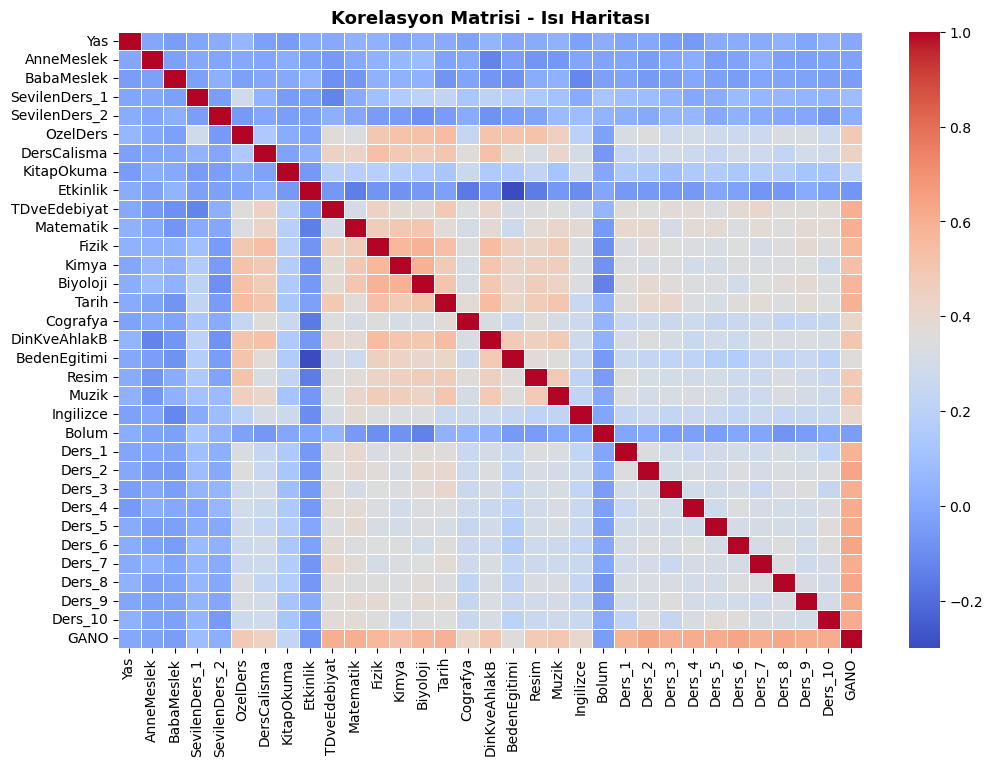

In [ ]:
numerical_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))                                                                 # Görsel boyutunu ayarla
sns.heatmap(numerical_data.corr(), cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi - Isi Haritasi", fontsize=13, fontweight='bold')
plt.show()

### **3- Regresyon Analizi**

In [ ]:
from sklearn.linear_model import Lasso

bolumler = [1, 2, 3]

# Kullanacağimiz modeller
models = {
    "Lasso Regression": Lasso(alpha=0.1),                                # Lineer ve Ridge Regresyon fazla ozellikte(sutunda) genelde asiri ogrenme olurmus. Fazla ozellikte Lasso daha iyiymis bende onu kullandim. (linner de cevaplar 0.9999 du)
    "Random Forest": RandomForestRegressor(random_state=42),    
    "SVM": SVR(),
    "Neural Network": MLPRegressor(activation= 'tanh', alpha = 1, early_stopping = True,               # Bu parametreler Asiri ogrenmeden kacinmak icin. Bu parametreler ayarlanmazsa -25.000 gibi cok kotu R2 degeri veriyor.
    hidden_layer_sizes= 99, learning_rate = 'constant', learning_rate_init = 0.01, max_iter = 3000,      
    random_state = 42, solver = 'lbfgs', tol = 0.01, verbose = True)
    
}
# R2 Deger karsilastirmasi:     
# hidden_layer_sizes = 32          iken =>   1.Bolum: 0.9182 / 2.Bolum: 0.9387 / 3.Bolum: 0.9497
# hidden_layer_sizes = 99          iken =>   1.Bolum: 0.9482 / 2.Bolum: 0.9385 / 3.Bolum: 0.9559        -> the best
# hidden_layer_sizes=(64, 64)      iken =>   1.Bolum: 0.9258 / 2.Bolum: 0.9258 / 3.Bolum: 0.9418
# hidden_layer_sizes=(128, 64)     iken =>   1.Bolum: 0.9328 / 2.Bolum: 0.9231 / 3.Bolum: 0.9596
# hidden_layer_sizes=(128 ,64, 32) iken =>   1.Bolum: 0.9412 / 2.Bolum: 0.9195 / 3.Bolum: 0.9460

# hidden_layer_sizes = 99 iken aplha karsilastirmasi:                         Regularization (Ceza) katsayisi
# alpha = 0.01   iken   =>   1.Bolum: 0.9482 / 2.Bolum: 0.9385 / 3.Bolum: 0.9559
# alpha = 0.1    iken   =>   1.Bolum: 0.9484 / 2.Bolum: 0.9388 / 3.Bolum: 0.9561
# alpha = 0.5    iken   =>   1.Bolum: 0.9493 / 2.Bolum: 0.9435 / 3.Bolum: 0.9571
# alpha = 1      iken   =>   1.Bolum: 0.9540 / 2.Bolum: 0.9562 / 3.Bolum: 0.9584                        -> the best



# Performans metrikleri (MSE ve R2 için scorer'lar)
def neg_mse(y_true, y_pred):
    return -mean_squared_error(y_true, y_pred)

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# KFold ayari
kf = KFold(n_splits=5, shuffle=True, random_state = 42)

# Sonuçlari tutmak için
results_2 = {}

for bolum in bolumler:
    df_bolum = data[data['Bolum'] == bolum]
    X = df_bolum.drop(columns=['GANO', 'Bolum'])  # Özellikler
    y = df_bolum['GANO']                           # Hedef

    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)                                                                                     # x degerlerini olcekliyoruz (ozellikle Yapay Sinir Agi icin onemli) 

    print(f"\n== Bölüm: {bolum} için sonuçlar ==")
    results_2[bolum] = {}

    for name, model in models.items():

        # MSE (Mean Squared Error): Ortalama kare hata. Hata değeridir. Daha düşük olmasi daha iyidir. 0 en iyi değerdir. 
        # Çiktilar negatiftir, bu yüzden -ile çarpilir. Aralik: 0 → ∞ (ama negatif döner, çünkü sklearn negatif verir)
        mse_scores = cross_val_score(model, X_scaled, y, scoring=mse_scorer, cv=kf)

        # MedAE (Median Absolute Error): Mutlak hatalarin medyani. Gürültülü veri için daha dayaniklidir. Daha düşük = daha iyi.
        # Çiktilar negatiftir, bu yüzden -ile çarpilir. Aralik: 0 → ∞
        medae_scores = cross_val_score(model, X_scaled, y, scoring='neg_median_absolute_error', cv=kf)

        # Explained Variance Score: Modelin tahmin ettiği değişkenliğin orani. 1'e yakinsa model çok iyi açikliyor demektir.
        # Aralik: -∞ → 1 (1 en iyi, 0 ve alti kötü)
        explained_var_scores = cross_val_score(model, X_scaled, y, scoring='explained_variance', cv=kf)

        # R² Skoru (Determinasyon Katsayisi): Modelin veriyi ne kadar iyi açikladiğini gösterir. 1'e yakinsa çok iyi, 0 kötü.
        # Aralik: -∞ → 1 (1 mükemmel, 0 kötü, negatif çok kötü)
        r2_scores = cross_val_score(model, X_scaled, y, scoring=r2_scorer, cv=kf)

        print(f"{name}:  ----->  Ortalama MSE {-mse_scores.mean():.4f}   /   Ortalama MedAE: {medae_scores.mean():.4f}   /   Ortalama EVS: {explained_var_scores.mean():.4f}   /   Ortalama R2: {r2_scores.mean():.4f}")

        results_2[bolum][name] = {
            'MSE': -mse_scores.mean(),
            'MedAE': -medae_scores.mean(),
            'EVS': explained_var_scores.mean(),
            'R2': r2_scores.mean()
        }



== Bölüm: 1 için sonuçlar ==
Lasso Regression:  ----->  Ortalama MSE 0.0302   /   Ortalama MedAE: -0.1276   /   Ortalama EVS: 0.9444   /   Ortalama R2: 0.9427
Random Forest:  ----->  Ortalama MSE 0.0660   /   Ortalama MedAE: -0.1653   /   Ortalama EVS: 0.8780   /   Ortalama R2: 0.8743
SVM:  ----->  Ortalama MSE 0.0234   /   Ortalama MedAE: -0.0949   /   Ortalama EVS: 0.9564   /   Ortalama R2: 0.9555
Neural Network:  ----->  Ortalama MSE 0.0237   /   Ortalama MedAE: -0.1045   /   Ortalama EVS: 0.9548   /   Ortalama R2: 0.9540

== Bölüm: 2 için sonuçlar ==
Lasso Regression:  ----->  Ortalama MSE 0.0343   /   Ortalama MedAE: -0.1387   /   Ortalama EVS: 0.9299   /   Ortalama R2: 0.9279
Random Forest:  ----->  Ortalama MSE 0.0671   /   Ortalama MedAE: -0.1720   /   Ortalama EVS: 0.8592   /   Ortalama R2: 0.8581
SVM:  ----->  Ortalama MSE 0.0215   /   Ortalama MedAE: -0.0866   /   Ortalama EVS: 0.9547   /   Ortalama R2: 0.9544
Neural Network:  ----->  Ortalama MSE 0.0207   /   Ortalama MedA

### **4- Regresyon Modellerinin R2 Karşilaştirilmasi**

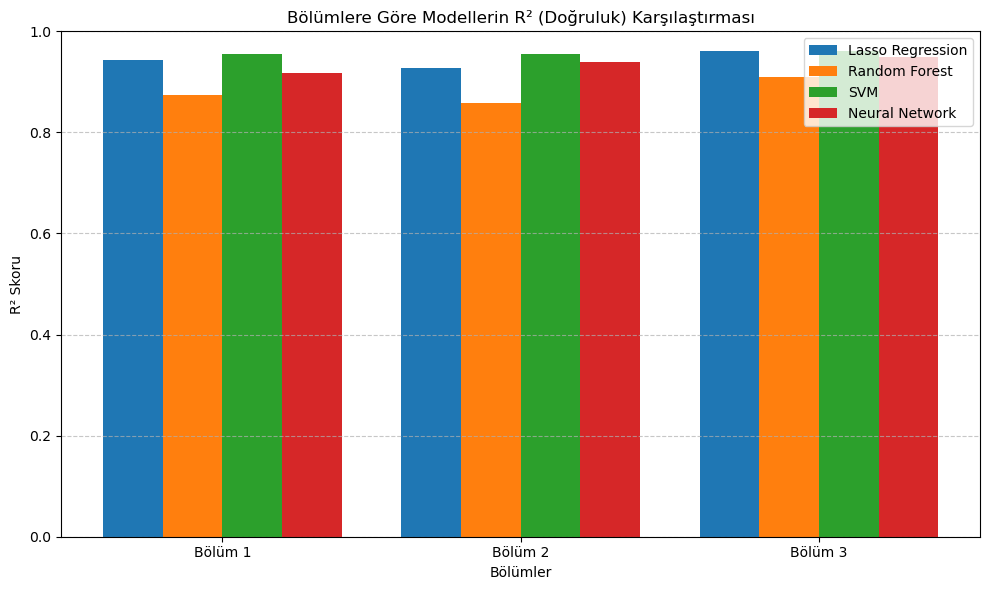

In [ ]:

# Her model için her bölümdeki R² skorlarini topla
r2_values = {model: [results_2[bolum][model]['R2'] for bolum in bolumler] for model in models}

# Çubuklarin konumlarini ayarla
x = np.arange(len(bolumler))  # Bölüm sayisi kadar pozisyon
width = 0.2  # Çubuk genişliği

# Grafik çizimi
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar(x + i * width, r2_values[model], width, label=model)

# Ekseni ve etiketleri ayarla
plt.xlabel('Bölümler')
plt.ylabel('R² Skoru')
plt.title('Bölümlere Göre Modellerin R² (Doğruluk) Karşilaştirmasi')
plt.xticks(x + width * 1.5, [f"Bölüm {b}" for b in bolumler])
plt.ylim(0, 1)  # R² skorlari genelde 0-1 arasinda olur
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **5- İkili Siniflandirma ve F1 Score, Precision, Recall, Accuracy Ölçüm Metrikleri**

In [ ]:

bolumler = [1, 2, 3]

# Siniflandirma modelleri
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=32, activation='tanh', alpha=0.01,
    early_stopping=True, max_iter=3000, random_state=42, learning_rate='constant',
    learning_rate_init=0.01, solver='lbfgs', tol=0.01, verbose=True)
}


def gano_to_class(gano):                                                                                    # GANO'yu siniflandirmak icin ozel fonksiyon
    return np.where(gano >= 2.0, 1, 0)


# Skorlayicilar
scorers = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'Recall': make_scorer(recall_score, average='weighted'),
    'F1 Score': make_scorer(f1_score, average='weighted')
}

# KFold ayari
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


results_1 = {}                                                                                              # Sonuclari tutmak icin - Cokta gerek varmi? Yooo

for bolum in bolumler:
    df_bolum = data[data['Bolum'] == bolum]
    X = df_bolum.drop(columns=['GANO', 'Bolum'])
    y = df_bolum['GANO'].apply(gano_to_class)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"\n========= Bölüm: {bolum} için sonuçlar =========")
    
    print("Sinif dagilimi:")                                                                                # Sinif dagilimini yazdir
    print(y.value_counts())
    results_1[bolum] = {}

    for name, model in models.items():
        print(f"\nModel: {name}")
        model_results = {}
        for metric_name, scorer in scorers.items():
            scores = cross_val_score(model, X_scaled, y, scoring=scorer, cv=skf)
            mean_score = scores.mean()
            model_results[metric_name] = mean_score
            print(f"{metric_name}: {mean_score:.4f}")
            
        results_1[bolum][name] = model_results


========= Bölüm: 1 için sonuçlar =========
Sinif dagilimi:
GANO
1    273
0     57
Name: count, dtype: int64

Model: Logistic Regression
Accuracy: 0.9515
Precision: 0.9514
Recall: 0.9515
F1 Score: 0.9501

Model: Random Forest
Accuracy: 0.9485
Precision: 0.9501
Recall: 0.9485
F1 Score: 0.9458

Model: SVM
Accuracy: 0.9424
Precision: 0.9412
Recall: 0.9424
F1 Score: 0.9403

Model: Neural Network
Accuracy: 0.9455
Precision: 0.9490
Recall: 0.9455
F1 Score: 0.9462

========= Bölüm: 2 için sonuçlar =========
Sinif dagilimi:
GANO
1    298
0     66
Name: count, dtype: int64

Model: Logistic Regression
Accuracy: 0.9780
Precision: 0.9787
Recall: 0.9780
F1 Score: 0.9781

Model: Random Forest
Accuracy: 0.9423
Precision: 0.9441
Recall: 0.9423
F1 Score: 0.9384

Model: SVM
Accuracy: 0.9505
Precision: 0.9506
Recall: 0.9505
F1 Score: 0.9488

Model: Neural Network
Accuracy: 0.9559
Precision: 0.9604
Recall: 0.9559
F1 Score: 0.9571

========= Bölüm: 3 için sonuçlar =========
Sinif dagilimi:
GANO
1    245
0 

### **6- İkili Siniflandirmanin Doğruluk Karşilaştirmalari**

In [ ]:
accuracy_values = {
    model: [results_1[bolum][model]['Accuracy'] for bolum in bolumler]
    for model in models
}

x = np.arange(len(bolumler))  # Bölüm sayisina göre pozisyonlar
width = 0.2  # Çubuk genişliği

plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar(x + i * width, accuracy_values[model], width, label=model)

# Ekseni ve etiketleri ayarla
plt.xlabel('Bölümler')
plt.ylabel('Doğruluk (Accuracy)')
plt.title('Bölümlere Göre Modellerin Doğruluk (Accuracy) Karşilaştirmasi')
plt.xticks(x + width * 1.5, [f"Bölüm {b}" for b in bolumler])
plt.ylim(0, 1)  # Accuracy 0-1 arasinda olur
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **7- Confusion Matrix Hesaplama ve Görselleştirme - İkili Siniflandirma İçin**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt

bolum = 1
df_bolum = data[data['Bolum'] == bolum]
X = df_bolum.drop(columns=['GANO', 'Bolum'])
y = df_bolum['GANO'].apply(gano_to_class)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)                                                       

# cross_val_predict ile tahminleri al
y_pred = cross_val_predict(model, X_scaled, y, cv=skf)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kaldi', 'Geçti'])
disp.plot(cmap=plt.cm.Blues)

# Hücrelere TN, FP, FN, TP değerlerini yazdir
plt.text(0, -0.1, f'TN', ha='center', va='center', color='black', fontsize=12)
plt.text(0, 0.9, f'FP', ha='center', va='center', color='black', fontsize=12)
plt.text(1, -0.1, f'FN', ha='center', va='center', color='black', fontsize=12)
plt.text(1, 0.9, f'TP', ha='center', va='center', color='white', fontsize=12)

plt.title(f"Bölüm {bolum} için Confusion Matrix - Logistic Regression")
plt.show()

### **8- Roc eğrisi**

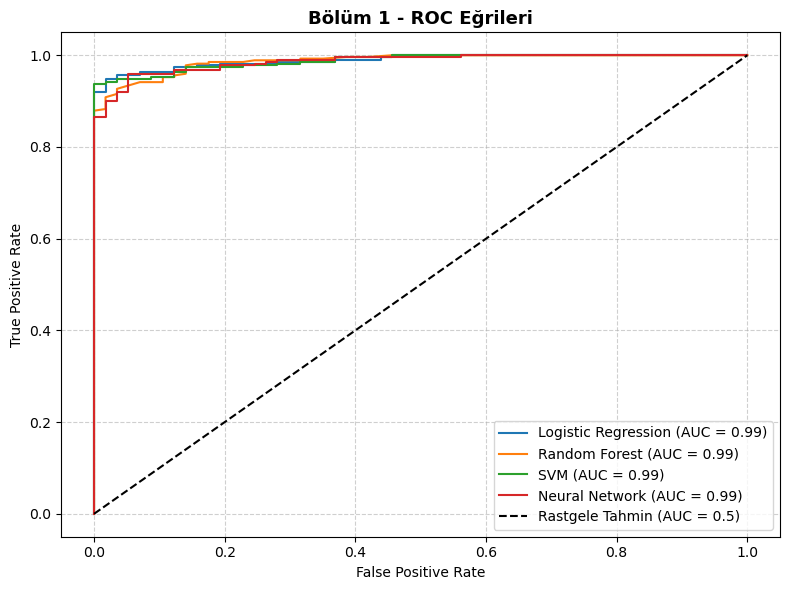

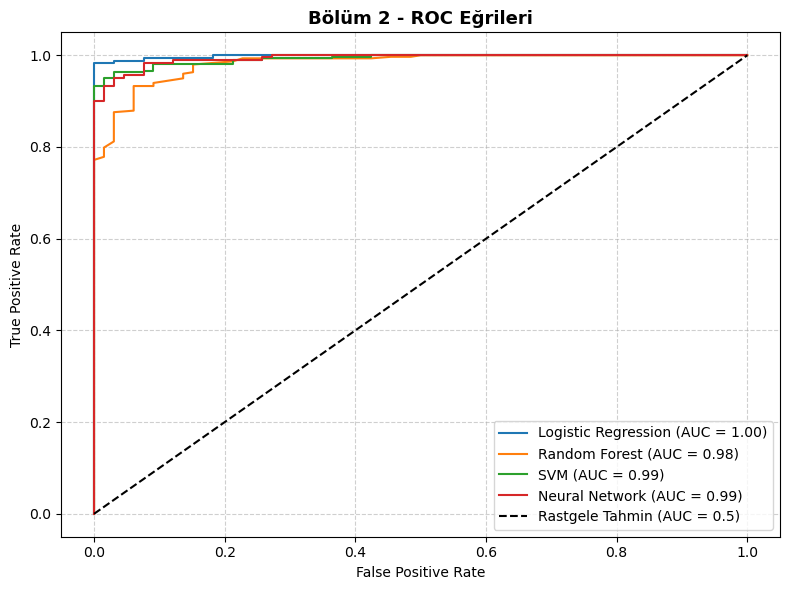

In [ ]:
for bolum in bolumler:
    df_bolum = data[data['Bolum'] == bolum]
    X = df_bolum.drop(columns=['GANO', 'Bolum'])
    y = df_bolum['GANO'].apply(gano_to_class)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    plt.figure(figsize=(8, 6))
    plt.title(f"Bölüm {bolum} - ROC Eğrileri", fontsize=13, fontweight="bold")

    for name, model in models.items():
        # ROC eğrisi için olasilik skorlari lazim
        if hasattr(model, "predict_proba"):
            y_proba = cross_val_predict(model, X_scaled, y, cv=skf, method="predict_proba")[:, 1]
        elif hasattr(model, "decision_function"):
            y_proba = cross_val_predict(model, X_scaled, y, cv=skf, method="decision_function")
        else:
            print(f"Model {name} ROC eğrisi için uygun değil.")
            continue

        fpr, tpr, _ = roc_curve(y, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Rastgele Tahmin (AUC = 0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

### **9- Neural Network İçin Açiklabilir Yapay Zeka (Explainable AI - XAI) - SHAP**


====== BÖLÜM 1 - BİLGİSAYAR MÜH. SHAP ANALİZİ ======


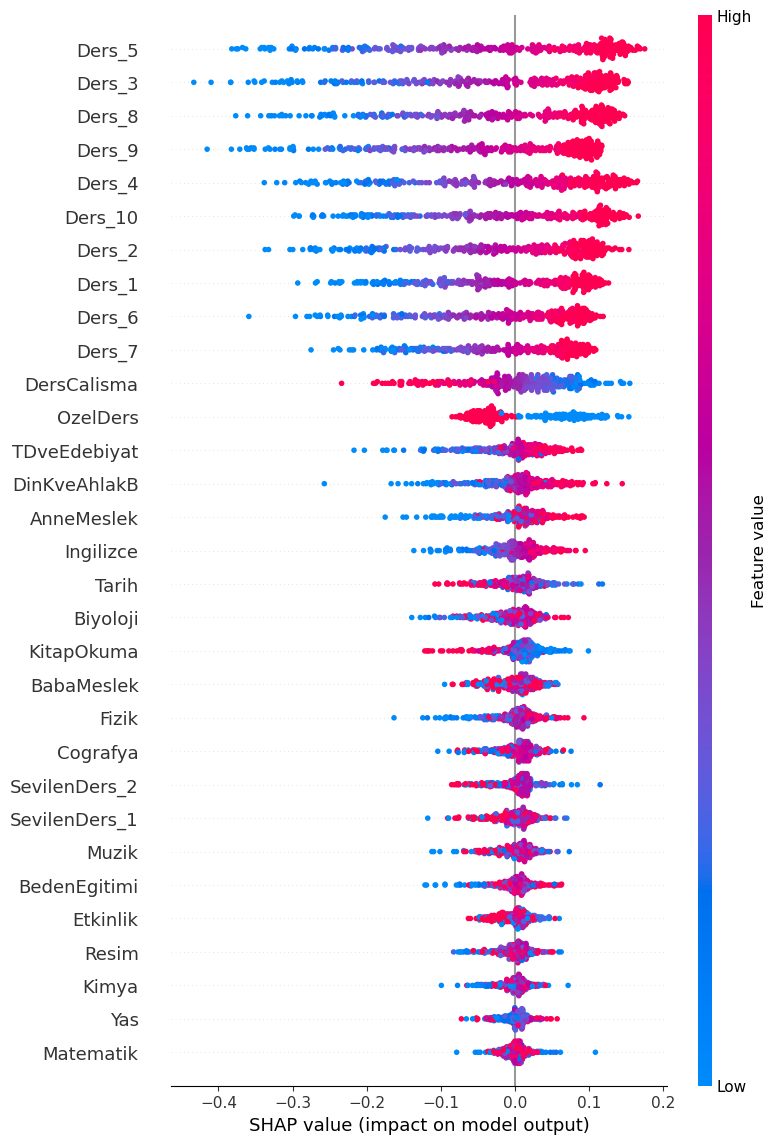


====== BÖLÜM 2 - HUKUK SHAP ANALİZİ ======


PermutationExplainer explainer: 365it [00:10, 10.01s/it]                 


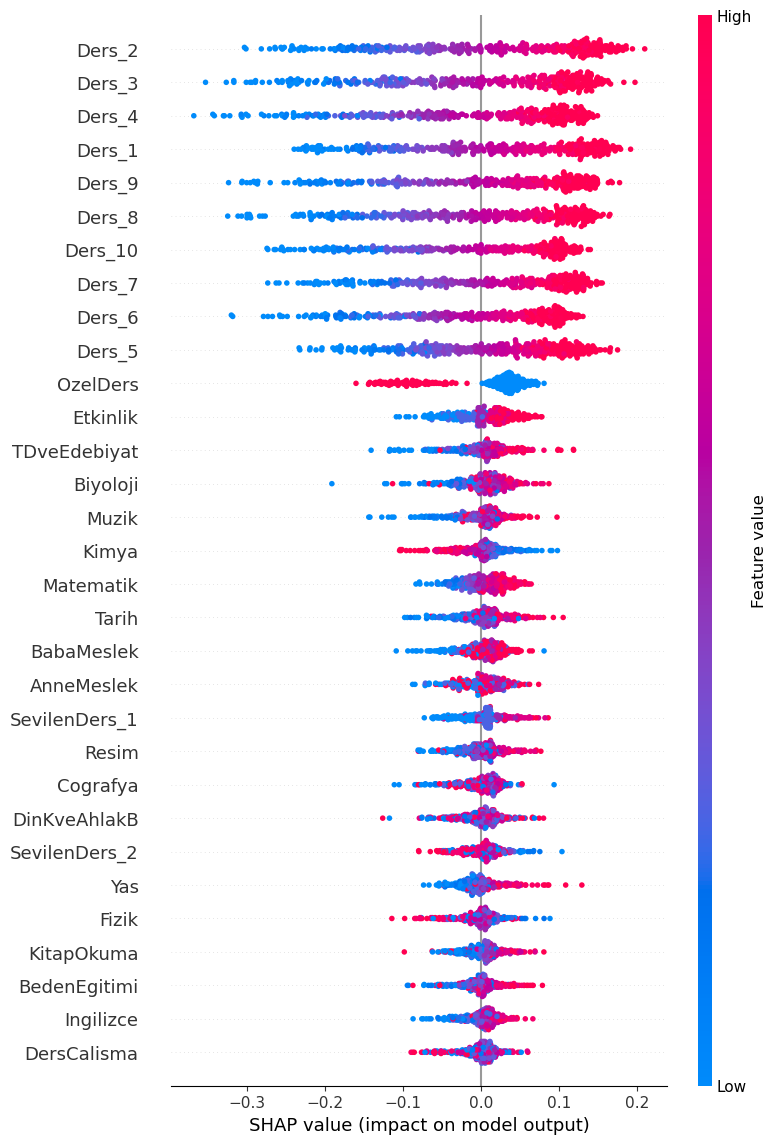


====== BÖLÜM 3 - GAZETECİLİK SHAP ANALİZİ ======


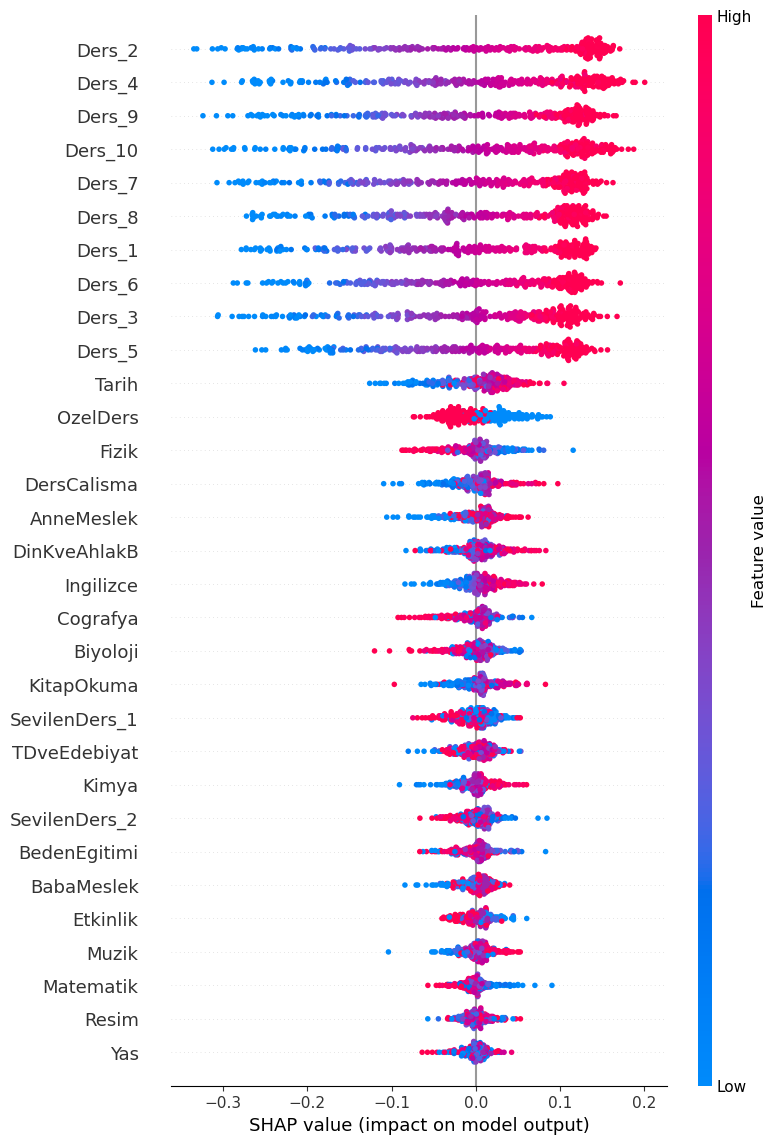

In [ ]:
bolumler = [1, 2, 3]

for bolum in bolumler:
    if bolum == 1:
        print(f"\n====== BÖLÜM {bolum} - BİLGİSAYAR MÜH. SHAP ANALİZİ ======")
    elif bolum == 2:
        print(f"\n====== BÖLÜM {bolum} - HUKUK SHAP ANALİZİ ======")
    elif bolum == 3:
        print(f"\n====== BÖLÜM {bolum} - GAZETECİLİK SHAP ANALİZİ ======")
        

    # Veriyi böl
    df_bolum = data[data['Bolum'] == bolum]
    X = df_bolum.drop(columns=['GANO', 'Bolum'])
    y = df_bolum['GANO']

    # Özellikleri ölçekle
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    # Modeli tanimla ve eğit
    model = MLPRegressor(
        activation='tanh', alpha=0.01, early_stopping=True,
        hidden_layer_sizes=32, learning_rate='constant',
        learning_rate_init=0.01, max_iter=3000,
        random_state=42, solver='lbfgs', tol=0.01, verbose=False
    )
    model.fit(X_scaled, y)

    # SHAP açiklayiciyi oluştur (Kernel Explainer olarak)
    explainer = shap.Explainer(model.predict, X_scaled)
    shap_values = explainer(X_scaled)

    # Özet grafiği
    shap.plots.beeswarm(shap_values, max_display=31)                            # en fazla 31 ozellik var bizde max'i 31 e cektik. Varsayilan ayarlarda 10 tane gosteriyor
    plt.show()

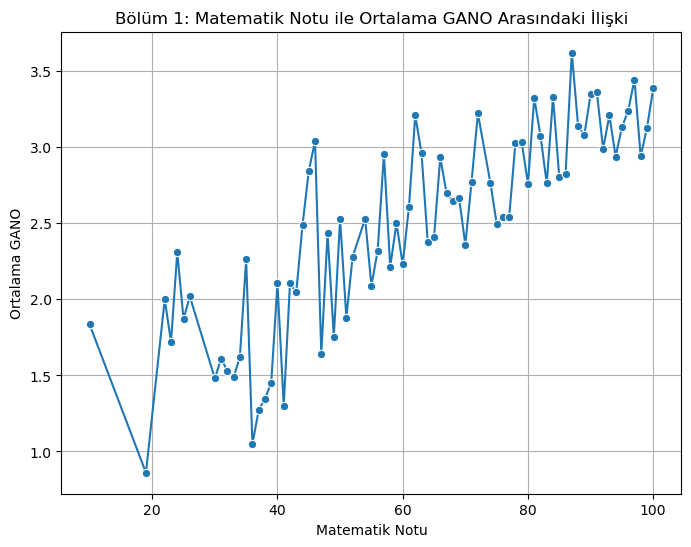

In [ ]:
# Bölüm 1 verisini filtrele
df_bolum1 = data[data['Bolum'] == 1]

# Matematik notlarina göre GANO ortalamasi hesapla
mean_gano_per_math = df_bolum1.groupby('Matematik')['GANO'].mean().reset_index()

# Çizgi grafiği çiz
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_gano_per_math, x='Matematik', y='GANO', marker='o')
plt.title('Bölüm 1: Matematik Notu ile Ortalama GANO Arasindaki İlişki')
plt.xlabel('Matematik Notu')
plt.ylabel('Ortalama GANO')
plt.grid(True)
plt.show()


### **10- Yeni Verisetini Dişa Aktarma**

In [604]:
data.to_excel('Datasets\Yeni_Sentetik_Ogrenci_Veriseti.xlsx', index=False)